In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import subplots

### Q2. TOP INDICATIONS BASED ON PATIENT COUNTS FOR INPATIENT AND OUTPATIENT SERVICES

### Top 10 & Bottom 10 Inpatient Total Discharges by Service and Year

In [2]:
dfihp18 = pd.read_csv("Inpatient_2018_PrvSrv.csv", usecols = ['DRG_Cd','DRG_Desc','Tot_Dschrgs'])
dfihp18 = pd.DataFrame(dfihp18)
dfihp18 = dfihp18.groupby(['DRG_Cd','DRG_Desc']).sum().reset_index()
dfihp18 = dfihp18.sort_values(by = 'Tot_Dschrgs', ascending=False)
#dfihp18.head()

dfihp19 = pd.read_csv("Inpatient_2019_PrvSrv.csv", usecols = ['DRG_Cd','DRG_Desc','Tot_Dschrgs'])
dfihp19 = pd.DataFrame(dfihp19)
dfihp19 = dfihp19.groupby(['DRG_Cd','DRG_Desc']).sum().reset_index()
dfihp19 = dfihp19.sort_values(by = 'Tot_Dschrgs', ascending=False)
#dfihp19.head()

dfihp20 = pd.read_csv("Inpatient_2020_PrvSrv.csv", usecols = ['DRG_Cd','DRG_Desc','Tot_Dschrgs'])
dfihp20 = pd.DataFrame(dfihp20)
dfihp20 = dfihp20.groupby(['DRG_Cd','DRG_Desc']).sum().reset_index()
dfihp20 = dfihp20.sort_values(by = 'Tot_Dschrgs', ascending=False)
dfihp20.head()
#dfihp20.info()

dfihpa = pd.merge(dfihp18, dfihp19, how='left', left_on=['DRG_Cd'], right_on = ['DRG_Cd'])
dfihpb = pd.merge(dfihpa, dfihp20, how='left', left_on=['DRG_Cd'], right_on = ['DRG_Cd'])
dfihpb.head()
dfihp = pd.DataFrame().assign(DRG_Cd=dfihpb['DRG_Cd'],DRG_Desc=dfihpb['DRG_Desc_x'],TOT_DSCH_18=dfihpb['Tot_Dschrgs_x'],TOT_DSCH_19=dfihpb['Tot_Dschrgs_y'],TOT_DSCH_20=dfihpb['Tot_Dschrgs'])
dfihpc = dfihp.sort_values(by = 'TOT_DSCH_20', ascending=False)
dfihpc = dfihpc.head(10)
dfihpc


DRG_Cd                                           DRG_Desc  TOT_DSCH_18  \
0      871  SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W...       625930   
2      291                        HEART FAILURE & SHOCK W MCC       381898   
1      470  MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTA...       463050   
24     177       RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC        73413   
3      193                  SIMPLE PNEUMONIA & PLEURISY W MCC       164685   
4      872  SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W...       159380   
5      189              PULMONARY EDEMA & RESPIRATORY FAILURE       147918   
9      378                               G.I. HEMORRHAGE W CC       128431   
7      392  "ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDER...       141917   
10     690          KIDNEY & URINARY TRACT INFECTIONS W/O MCC       128310   

    TOT_DSCH_19  TOT_DSCH_20  
0      607114.0     586558.0  
2      393492.0     329977.0  
1      420838.0     268571.0  
24      72024.0     179339.0  
3      147397.0     128737.0  
4      153356.0     125785.0  
5      142779.0     106791.0  
9      122839.0     103754.0  
7      133569.0     102085.0  
10     126130.0      95036.0

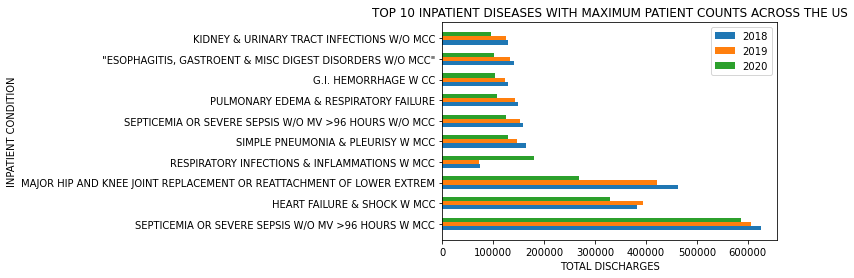

In [54]:
X = dfihpc['DRG_Desc']
y = dfihpc['TOT_DSCH_18']
z = dfihpc['TOT_DSCH_19']
a = dfihpc['TOT_DSCH_20']
  
Y_axis = np.arange(len(X))
  
plt.barh(Y_axis - 0.2, y, 0.2, label = '2018',align='center')
plt.barh(Y_axis, z, 0.2, label = '2019',align='center')
plt.barh(Y_axis + 0.2, a, 0.2, label = '2020',align='center')

plt.yticks(Y_axis, X)
plt.ylabel("INPATIENT CONDITION")
plt.xlabel("TOTAL DISCHARGES")
plt.title("TOP 10 INPATIENT DISEASES WITH MAXIMUM PATIENT COUNTS ACROSS THE US")
plt.legend()
plt.show()

In [3]:
dfihpd = dfihp.sort_values(by = 'TOT_DSCH_20', ascending=True)
dfihpd=dfihpd.dropna()
dfihpd = dfihpd.head(10)
dfihpd

DRG_Cd                                           DRG_Desc  TOT_DSCH_18  \
502     876  O.R. PROCEDURE W PRINCIPAL DIAGNOSES OF MENTAL...           33   
444     245                          AICD GENERATOR PROCEDURES           86   
524     137                          MOUTH PROCEDURES W CC/MCC           15   
494     754     "MALIGNANCY, FEMALE REPRODUCTIVE SYSTEM W MCC"           39   
522     218  CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...           16   
499     102                                    HEADACHES W MCC           35   
505     513  HAND OR WRIST PROC, EXCEPT MAJOR THUMB OR JOIN...           30   
507     585  "BREAST BIOPSY, LOCAL EXCISION & OTHER BREAST ...           27   
490     606                         MINOR SKIN DISORDERS W MCC           43   
483     929  FULL THICKNESS BURN W SKIN GRAFT OR INHAL INJ ...           47   

     TOT_DSCH_19  TOT_DSCH_20  
502         16.0         11.0  
444         86.0         11.0  
524         12.0         11.0  
494         47.0         11.0  
522         16.0         12.0  
499         11.0         12.0  
505         32.0         12.0  
507         16.0         13.0  
490         13.0         13.0  
483         28.0         13.0

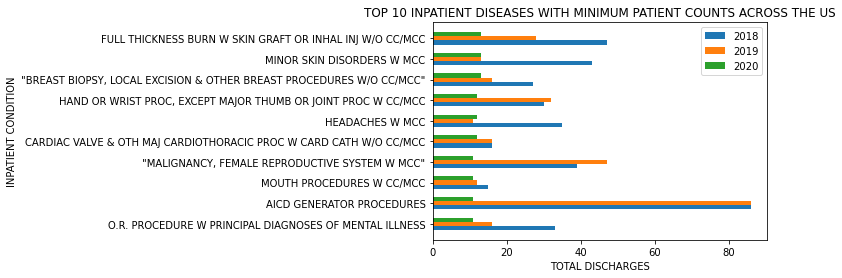

In [55]:
X = dfihpd['DRG_Desc']
y = dfihpd['TOT_DSCH_18']
z = dfihpd['TOT_DSCH_19']
a = dfihpd['TOT_DSCH_20']
  
Y_axis = np.arange(len(X))
  
plt.barh(Y_axis - 0.2, y, 0.2, label = '2018',align='center')
plt.barh(Y_axis, z, 0.2, label = '2019',align='center')
plt.barh(Y_axis + 0.2, a, 0.2, label = '2020',align='center')

plt.yticks(Y_axis, X)
plt.ylabel("INPATIENT CONDITION")
plt.xlabel("TOTAL DISCHARGES")
plt.title("TOP 10 INPATIENT DISEASES WITH MINIMUM PATIENT COUNTS ACROSS THE US")
plt.legend()
plt.show()

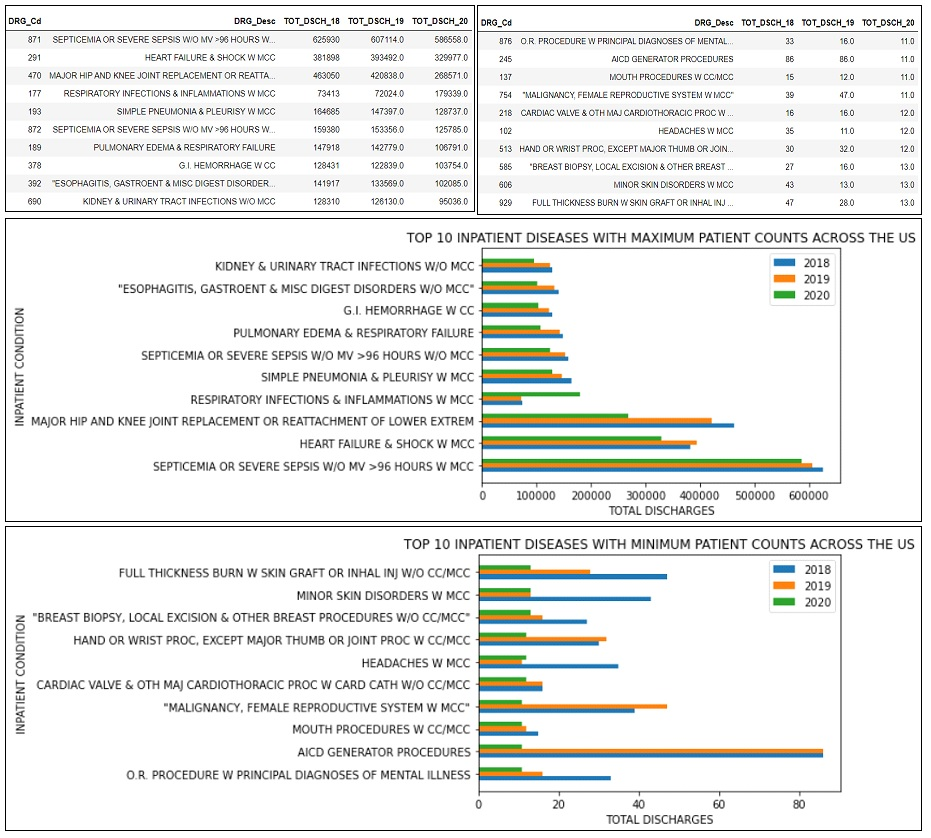

In [4]:
#One way ANOVA
from scipy.stats import f_oneway
import statsmodels.api as sm 
from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Two way ANOVA
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats



In [5]:
# Convert Wide data to long Data for ANOVA
# https://www.datasciencemadesimple.com/reshape-wide-long-pandas-python-melt-function/

dfihpan = pd.DataFrame().assign(DRG_Cd=dfihpb['DRG_Cd'],TOT_DSCH_18=dfihpb['Tot_Dschrgs_x'],TOT_DSCH_19=dfihpb['Tot_Dschrgs_y'],TOT_DSCH_20=dfihpb['Tot_Dschrgs'])
dfihpan = dfihpan.fillna(0)
ihpc_long2=pd.melt(dfihpan,id_vars=['DRG_Cd'],var_name='Year', value_name='Total_Patients')
ihpc_long2
#ihpc_long2.info()

#Transfer Dataframe to CSV file to run analysis in R
#ihpc_long.to_csv(r'C:\ADS First Sem\Inferential Stats - PSY60000\data files\ihpc2.csv', index=False, header=True)


#Run One way ANOVA
#Method 1
mod = ols('Total_Patients ~ Year', data=ihpc_long2).fit()
aov_table3 = sm.stats.anova_lm(mod, typ=2)
print("One way ANOVA with Year as IV")
print(aov_table3)
print("")

#Method 2
mod3 = f_oneway(dfihpan['TOT_DSCH_18'], dfihpan['TOT_DSCH_19'], dfihpan['TOT_DSCH_20'])
print(mod3)
print("")

mod2 = ols('Total_Patients ~ DRG_Cd', data=ihpc_long2).fit()
aov_table4 = sm.stats.anova_lm(mod2, typ=2)
print("One way ANOVA with DRG_Cd as IV")
print(aov_table4)
print("")

#Run Tukey Post Hoc Test

tukey = pairwise_tukeyhsd(endog=ihpc_long2['Total_Patients'],
                          groups=ihpc_long2['Year'],
                          alpha=0.05)
print("Post Hoc Tukey for Year as IV")
print(tukey)


One way ANOVA with Year as IV
                sum_sq      df        F    PR(>F)
Year      2.012724e+09     2.0  0.61592  0.540267
Residual  2.715572e+12  1662.0      NaN       NaN

F_onewayResult(statistic=0.6159195113299484, pvalue=0.5402672411432834)

One way ANOVA with DRG_Cd as IV
                sum_sq      df         F    PR(>F)
DRG_Cd    9.166968e+07     1.0  0.056098  0.812802
Residual  2.717493e+12  1663.0       NaN       NaN

Post Hoc Tukey for Year as IV
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1      group2    meandiff  p-adj    lower      upper   reject
---------------------------------------------------------------------
TOT_DSCH_18 TOT_DSCH_19  -456.5135    0.9 -6148.7284 5235.7013  False
TOT_DSCH_18 TOT_DSCH_20 -2526.8414 0.5479 -8219.0563 3165.3734  False
TOT_DSCH_19 TOT_DSCH_20 -2070.3279 0.6556 -7762.5428 3621.8869  False
---------------------------------------------------------------------


In [9]:
# Two way ANOVA

def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

#perform two-way ANOVA
model = ols('Total_Patients ~ C(DRG_Cd) + C(Year) + C(DRG_Cd):C(Year)', data=ihpc_long2).fit()
aov_table = sm.stats.anova_lm(model, type=2)
eta_squared(aov_table)
omega_squared(aov_table)
print("Two way ANOVA")
print(aov_table)

Two way ANOVA
                       df        sum_sq       mean_sq    F  PR(>F)    eta_sq  \
C(DRG_Cd)           554.0  2.671360e+12  4.821949e+09  0.0     NaN  0.982990   
C(Year)               2.0  2.012724e+09  1.006362e+09  0.0     NaN  0.000741   
C(DRG_Cd):C(Year)  1108.0  4.421210e+10  3.990262e+07  0.0     NaN  0.016269   
Residual              0.0  1.173575e-14           inf  NaN     NaN       NaN   

                   omega_sq  
C(DRG_Cd)               NaN  
C(Year)                 NaN  
C(DRG_Cd):C(Year)       NaN  
Residual                NaN  


C:\Users\Nicole\AppData\Local\Temp/ipykernel_8460/666181714.py:9: RuntimeWarning:

divide by zero encountered in double_scalars



### CONCLUSION:

Based on the ANOVA results, there is no significant difference in the rate of inpatient services availed before and during the pandemic.

### Top 10 & Bottom 10 Inpatient Total Discharges by State and Year

In [6]:
#Top 10 Inpatient Total Discharges by State and Year

dfihp18a = pd.read_csv("Inpatient_2018_PrvSrv.csv", usecols = ['Prv_State','Tot_Dschrgs'])
dfihp18a = pd.DataFrame(dfihp18a)
dfihp18a = dfihp18a.groupby(['Prv_State']).sum().reset_index()
dfihp18a = dfihp18a.sort_values(by = 'Tot_Dschrgs', ascending=False)
#dfihp18a.head()

dfihp19a = pd.read_csv("Inpatient_2019_PrvSrv.csv", usecols = ['Prv_State','Tot_Dschrgs'])
dfihp19a = pd.DataFrame(dfihp19a)
dfihp19a = dfihp19a.groupby(['Prv_State']).sum().reset_index()
dfihp19a = dfihp19a.sort_values(by = 'Tot_Dschrgs', ascending=False)
#dfihp19a.head()

dfihp20a = pd.read_csv("Inpatient_2020_PrvSrv.csv", usecols = ['Prv_State','Tot_Dschrgs'])
dfihp20a = pd.DataFrame(dfihp20a)
dfihp20a = dfihp20a.groupby(['Prv_State']).sum().reset_index()
dfihp20a = dfihp20a.sort_values(by = 'Tot_Dschrgs', ascending=False)
dfihp20a.head()
#dfihp20a.info()

dfihpta = pd.merge(dfihp18a, dfihp19a, how='left', left_on=['Prv_State'], right_on = ['Prv_State'])
dfihptb = pd.merge(dfihpta, dfihp20a, how='left', left_on=['Prv_State'], right_on = ['Prv_State'])
dfihptb.head()
dfihpt = pd.DataFrame().assign(Prv_State=dfihptb['Prv_State'],TOT_DSCH_18=dfihptb['Tot_Dschrgs_x'],TOT_DSCH_19=dfihptb['Tot_Dschrgs_y'],TOT_DSCH_20=dfihptb['Tot_Dschrgs'])
dfihptc = dfihpt.sort_values(by = 'TOT_DSCH_20', ascending=False)
dfihptc = dfihptc.head(10)
dfihptc

Prv_State  TOT_DSCH_18  TOT_DSCH_19  TOT_DSCH_20
0         FL       566195       548276       476488
1         CA       536190       526766       448288
2         TX       491290       472628       400557
3         NY       428538       426884       357657
4         IL       324291       316887       265867
5         PA       316478       307961       256569
6         OH       277340       262206       216316
8         NC       257082       249423       207296
7         MI       269411       254397       200360
11        MA       225035       222575       193702

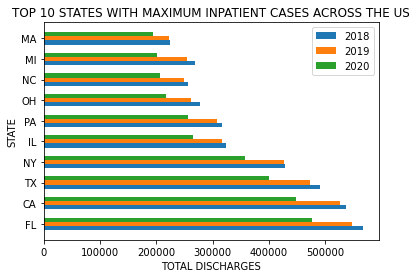

In [61]:
X = dfihptc['Prv_State']
y = dfihptc['TOT_DSCH_18']
z = dfihptc['TOT_DSCH_19']
a = dfihptc['TOT_DSCH_20']
  
Y_axis = np.arange(len(X))
  
plt.barh(Y_axis - 0.2, y, 0.2, label = '2018',align='center')
plt.barh(Y_axis, z, 0.2, label = '2019',align='center')
plt.barh(Y_axis + 0.2, a, 0.2, label = '2020',align='center')


plt.yticks(Y_axis, X)
plt.ylabel("STATE")
plt.xlabel("TOTAL DISCHARGES")
plt.title("TOP 10 STATES WITH MAXIMUM INPATIENT CASES ACROSS THE US")
plt.legend()
plt.show()

In [7]:
dfihptd = dfihpt.sort_values(by = 'TOT_DSCH_20', ascending=True)
dfihptd = dfihptd.head(10)
dfihptd

Prv_State  TOT_DSCH_18  TOT_DSCH_19  TOT_DSCH_20
49        WY         8267         8373         6486
50        AK         8245         8707         7649
48        HI        13056        13021        11028
47        VT        13521        13465        11143
46        MT        20557        21670        17371
45        RI        22465        21573        17739
43        ID        24348        23060        19422
44        ND        22937        22550        19843
42        DC        25717        23932        20403
39        ME        30183        28858        21002

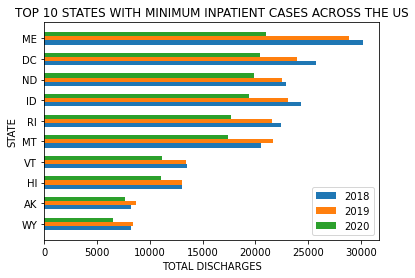

In [64]:
X = dfihptd['Prv_State']
y = dfihptd['TOT_DSCH_18']
z = dfihptd['TOT_DSCH_19']
a = dfihptd['TOT_DSCH_20']
  
Y_axis = np.arange(len(X))
  
plt.barh(Y_axis - 0.2, y, 0.2, label = '2018',align='center')
plt.barh(Y_axis, z, 0.2, label = '2019',align='center')
plt.barh(Y_axis + 0.2, a, 0.2, label = '2020',align='center')


plt.yticks(Y_axis, X)
plt.ylabel("STATE")
plt.xlabel("TOTAL DISCHARGES")
plt.title("TOP 10 STATES WITH MINIMUM INPATIENT CASES ACROSS THE US")
plt.legend()
plt.show()

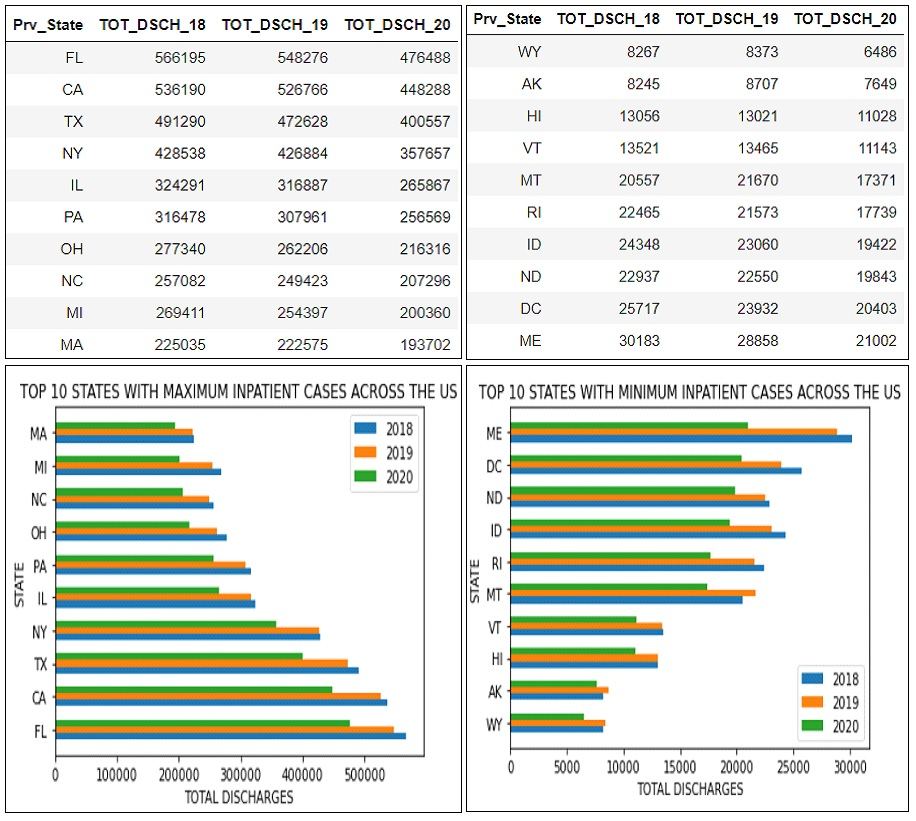

In [10]:
dfihptan = pd.DataFrame().assign(Prv_State=dfihptb['Prv_State'],TOT_DSCH_18=dfihptb['Tot_Dschrgs_x'],TOT_DSCH_19=dfihptb['Tot_Dschrgs_y'],TOT_DSCH_20=dfihptb['Tot_Dschrgs'])
dfihptan = dfihptan.fillna(0)
ihpc_long3=pd.melt(dfihptan,id_vars=['Prv_State'],var_name='Year', value_name='Total_Patients')
ihpc_long3

#Run One way ANOVA

moda = ols('Total_Patients ~ Year', data=ihpc_long3).fit()
aov_table3a = sm.stats.anova_lm(moda, typ=2)
print("One way ANOVA with Year as IV")
print(aov_table3a)
print("")


mod2a = ols('Total_Patients ~ Prv_State', data=ihpc_long3).fit()
aov_table4a = sm.stats.anova_lm(mod2a, typ=2)
print("One way ANOVA with State as IV")
print(aov_table4a)
print("")

#Run Tukey Post Hoc Test
tukeya = pairwise_tukeyhsd(endog=ihpc_long3['Total_Patients'],
                          groups=ihpc_long3['Year'],
                          alpha=0.05)
print("Post Hoc Tukey for Year as IV")
print(tukeya)
print("")

#Two way ANOVA

modela = ols('Total_Patients ~ C(Prv_State) + C(Year) + C(Prv_State):C(Year)', data=ihpc_long3).fit()
aov_tablea = sm.stats.anova_lm(modela, type=2)
eta_squared(aov_tablea)
omega_squared(aov_tablea)
print("Two way ANOVA")
print(aov_tablea)


One way ANOVA with Year as IV
                sum_sq     df         F   PR(>F)
Year      2.188390e+10    2.0  0.655932  0.52044
Residual  2.502230e+12  150.0       NaN      NaN

One way ANOVA with State as IV
                 sum_sq     df           F        PR(>F)
Prv_State  2.483857e+12   50.0  125.866132  3.860289e-73
Residual   4.025759e+10  102.0         NaN           NaN

Post Hoc Tukey for Year as IV
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
   group1      group2     meandiff  p-adj     lower      upper    reject
------------------------------------------------------------------------
TOT_DSCH_18 TOT_DSCH_19  -4955.1569    0.9 -65505.6181 55595.3043  False
TOT_DSCH_18 TOT_DSCH_20 -27482.1569 0.5302 -88032.6181 33068.3043  False
TOT_DSCH_19 TOT_DSCH_20    -22527.0 0.6409 -83077.4612 38023.4612  False
------------------------------------------------------------------------

Two way ANOVA
                         df        sum_sq       mean_sq    F  P

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Nicole\AppData\Local\Temp/ipykernel_8460/666181714.py:9: RuntimeWarning:

divide by zero encountered in double_scalars



### CONCLUSION:

As expected, there is a significant difference in inpatient services availed in different states.

### Top 10 & Bottom 10 Outpatient Total Discharges by Service and Year

In [11]:
#Top 10 Outpatient Total Discharges by Service and Year

dfopd18 = pd.read_csv("Outpatient_2018_PrvSrv.csv", usecols = ['APC_Cd','APC_Desc','Bene_Cnt'])
dfopd18 = pd.DataFrame(dfopd18)
dfopd18 = dfopd18.groupby(['APC_Cd','APC_Desc']).sum().reset_index()
dfopd18 = dfopd18.sort_values(by = 'Bene_Cnt', ascending=False)


dfopd19 = pd.read_csv("Outpatient_2019_PrvSrv.csv", usecols = ['APC_Cd','APC_Desc','Bene_Cnt'])
dfopd19 = pd.DataFrame(dfopd19)
dfopd19 = dfopd19.groupby(['APC_Cd','APC_Desc']).sum().reset_index()
dfopd19 = dfopd19.sort_values(by = 'Bene_Cnt', ascending=False)


dfopd20 = pd.read_csv("Outpatient_2020_PrvSrv.csv", usecols = ['APC_Cd','APC_Desc','Bene_Cnt'])
dfopd20 = pd.DataFrame(dfopd20)
dfopd20 = dfopd20.groupby(['APC_Cd','APC_Desc']).sum().reset_index()
dfopd20 = dfopd20.sort_values(by = 'Bene_Cnt', ascending=False)


dfopda = pd.merge(dfopd18, dfopd19, how='left', left_on=['APC_Cd'], right_on = ['APC_Cd'])
dfopdb = pd.merge(dfopda, dfopd20, how='left', left_on=['APC_Cd'], right_on = ['APC_Cd'])
dfopdb.head()
dfopd = pd.DataFrame().assign(APC_Cd=dfopdb['APC_Cd'],APC_Desc=dfopdb['APC_Desc_x'],TOT_DSCH_18=dfopdb['Bene_Cnt_x'],TOT_DSCH_19=dfopdb['Bene_Cnt_y'],TOT_DSCH_20=dfopdb['Bene_Cnt'])
dfopdc = dfopd.sort_values(by = 'TOT_DSCH_20', ascending=False)
dfopdc = dfopdc[dfopdc.APC_Cd != 8011]
dfopdc = dfopdc.head(10)
dfopdc

APC_Cd                                         APC_Desc  TOT_DSCH_18  \
1     5072  Level 2 Excision/ Biopsy/ Incision and Drainage     407260.0   
2     5191                  Level 1 Endovascular Procedures     345852.0   
12    5115               Level 5 Musculoskeletal Procedures     110308.0   
3     5491                   Level 1 Intraocular Procedures     301074.0   
4     5114               Level 4 Musculoskeletal Procedures     215778.0   
5     5302                      Level 2 Upper GI Procedures     191636.0   
7     5361         Level 1 Laparoscopy and Related Services     183598.0   
6     5193                  Level 3 Endovascular Procedures     185780.0   
10    5373             Level 3 Urology and Related Services     148728.0   
15    5374             Level 4 Urology and Related Services      94575.0   

    TOT_DSCH_19  TOT_DSCH_20  
1      414186.0     303525.0  
2      348311.0     269497.0  
12     138447.0     221411.0  
3      279931.0     198974.0  
4      210238.0     181656.0  
5      195551.0     161761.0  
7      184621.0     154995.0  
6      164919.0     136172.0  
10     158195.0     129782.0  
15     137861.0     127910.0

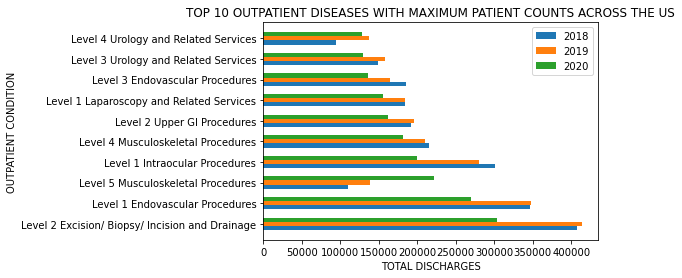

In [82]:
X = dfopdc['APC_Desc']
y = dfopdc['TOT_DSCH_18']
z = dfopdc['TOT_DSCH_19']
a = dfopdc['TOT_DSCH_20']
  
Y_axis = np.arange(len(X))
  
plt.barh(Y_axis - 0.2, y, 0.2, label = '2018',align='center')
plt.barh(Y_axis, z, 0.2, label = '2019',align='center')
plt.barh(Y_axis + 0.2, a, 0.2, label = '2020',align='center')

plt.yticks(Y_axis, X)
plt.ylabel("OUTPATIENT CONDITION")
plt.xlabel("TOTAL DISCHARGES")
plt.title("TOP 10 OUTPATIENT DISEASES WITH MAXIMUM PATIENT COUNTS ACROSS THE US")
plt.legend()
plt.show()

In [12]:
dfopdd = dfopd.sort_values(by = 'TOT_DSCH_20', ascending=True)
dfopdd=dfopdd.dropna()
dfopdd = dfopdd[dfopdd.TOT_DSCH_20 != 0.0]
dfopdd = dfopdd[dfopdd.TOT_DSCH_19 != 0.0]
dfopdd = dfopdd[dfopdd.TOT_DSCH_18 != 0.0]
dfopdd = dfopdd.head(10)
dfopdd

APC_Cd                                           APC_Desc  TOT_DSCH_18  \
56    5211              Level 1 Electrophysiologic Procedures         97.0   
57    5493                     Level 3 Intraocular Procedures         27.0   
54    5432                           Level 2 Nerve Procedures        796.0   
53    5094  Level 4 Breast/Lymphatic Surgery and Related P...        797.0   
52    5200          Implantation Wireless PA Pressure Monitor        980.0   
51    5116                 Level 6 Musculoskeletal Procedures       1868.0   
55    5093  Level 3 Breast/Lymphatic Surgery and Related P...        591.0   
50    5471               Implantation of Drug Infusion Device       2682.0   
49    5166                         Cochlear Implant Procedure       2823.0   
48    5212              Level 2 Electrophysiologic Procedures       4327.0   

    TOT_DSCH_19  TOT_DSCH_20  
56         78.0         29.0  
57         40.0        253.0  
54        503.0        398.0  
53        732.0        605.0  
52       1268.0        620.0  
51       2604.0       1326.0  
55       1556.0       1412.0  
50       2839.0       1814.0  
49       2750.0       1975.0  
48       3693.0       3292.0

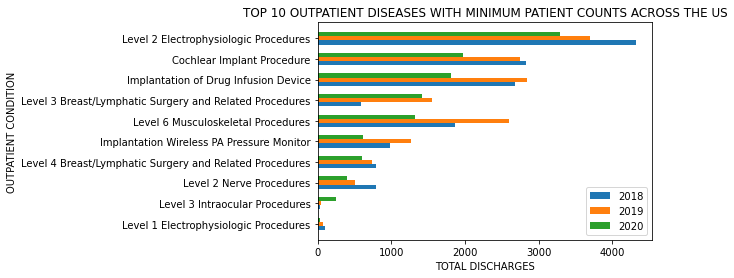

In [81]:
X = dfopdd['APC_Desc']
y = dfopdd['TOT_DSCH_18']
z = dfopdd['TOT_DSCH_19']
a = dfopdd['TOT_DSCH_20']
  
Y_axis = np.arange(len(X))
  
plt.barh(Y_axis - 0.2, y, 0.2, label = '2018',align='center')
plt.barh(Y_axis, z, 0.2, label = '2019',align='center')
plt.barh(Y_axis + 0.2, a, 0.2, label = '2020',align='center')

plt.yticks(Y_axis, X)
plt.ylabel("OUTPATIENT CONDITION")
plt.xlabel("TOTAL DISCHARGES")
plt.title("TOP 10 OUTPATIENT DISEASES WITH MINIMUM PATIENT COUNTS ACROSS THE US")
plt.legend()
plt.show()

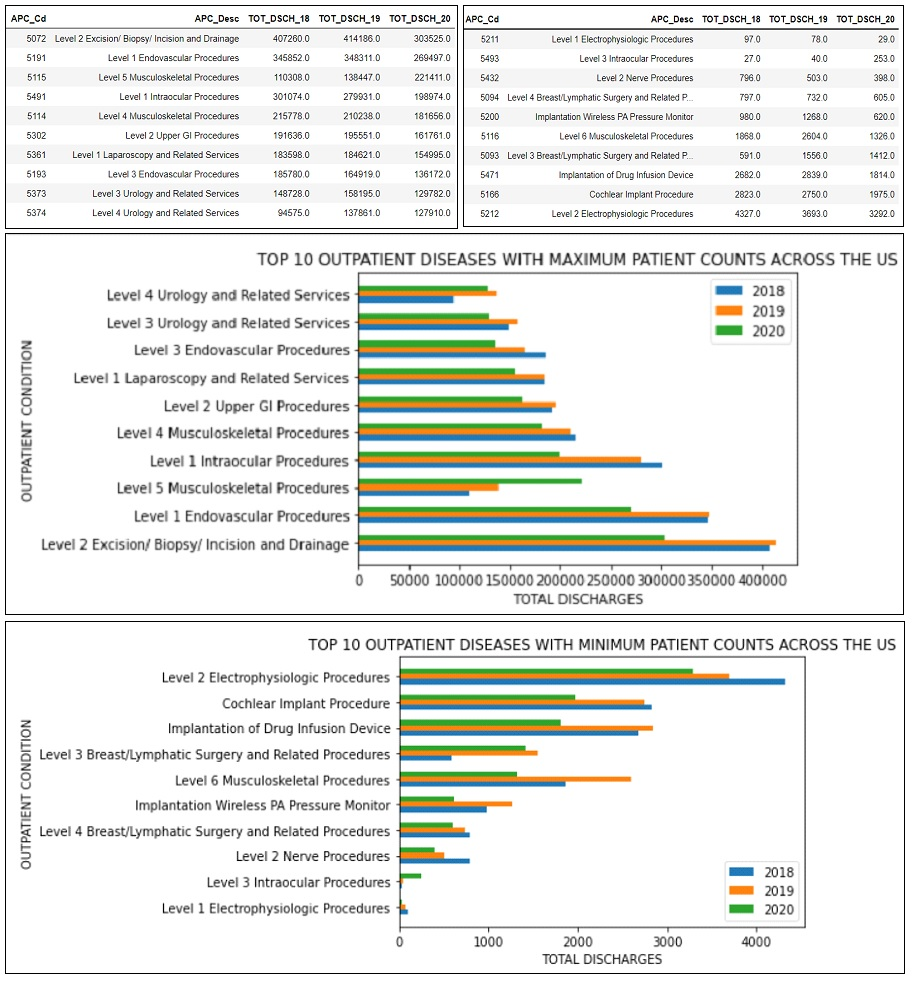

In [13]:
dfopdan = pd.DataFrame().assign(APC_Cd=dfopdb['APC_Cd'],TOT_DSCH_18=dfopdb['Bene_Cnt_x'],TOT_DSCH_19=dfopdb['Bene_Cnt_y'],TOT_DSCH_20=dfopdb['Bene_Cnt'])
dfopdan = dfopdan.fillna(0)
opdc_long2=pd.melt(dfopdan,id_vars=['APC_Cd'],var_name='Year', value_name='Total_Patients')
opdc_long2
#opdc_long2.info()


#Run One way ANOVA
#Method 1
modb = ols('Total_Patients ~ Year', data=opdc_long2).fit()
aov_table3b = sm.stats.anova_lm(modb, typ=2)
print("One way ANOVA with Year as IV")
print(aov_table3b)
print("")

#Method 2
mod3b = f_oneway(dfopdan['TOT_DSCH_18'], dfopdan['TOT_DSCH_19'], dfopdan['TOT_DSCH_20'])
print(mod3b)
print("")

mod2b = ols('Total_Patients ~ APC_Cd', data=opdc_long2).fit()
aov_table4b = sm.stats.anova_lm(mod2b, typ=2)
print("One way ANOVA with APC_Cd as IV")
print(aov_table4b)
print("")

#Run Tukey Post Hoc Test

tukeyb = pairwise_tukeyhsd(endog=opdc_long2['Total_Patients'],
                          groups=opdc_long2['Year'],
                          alpha=0.05)
print("Post Hoc Tukey for Year as IV")
print(tukeyb)

#perform two-way ANOVA
modelb = ols('Total_Patients ~ C(APC_Cd) + C(Year) + C(APC_Cd):C(Year)', data=opdc_long2).fit()
aov_tableb = sm.stats.anova_lm(modelb, type=2)
eta_squared(aov_tableb)
omega_squared(aov_tableb)
print("Two way ANOVA")
print(aov_tableb)


One way ANOVA with Year as IV
                sum_sq     df         F    PR(>F)
Year      9.425215e+09    2.0  0.175882  0.838859
Residual  4.903333e+12  183.0       NaN       NaN

F_onewayResult(statistic=0.17588184796974662, pvalue=0.8388586813522252)

One way ANOVA with APC_Cd as IV
                sum_sq     df           F        PR(>F)
APC_Cd    2.589029e+12    1.0  205.007251  9.842280e-32
Residual  2.323729e+12  184.0         NaN           NaN

Post Hoc Tukey for Year as IV
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
   group1      group2     meandiff  p-adj     lower      upper    reject
------------------------------------------------------------------------
TOT_DSCH_18 TOT_DSCH_19    257.1613    0.9 -69216.9053 69731.2279  False
TOT_DSCH_18 TOT_DSCH_20 -14970.4194 0.8532  -84444.486 54503.6472  False
TOT_DSCH_19 TOT_DSCH_20 -15227.5806 0.8482 -84701.6472  54246.486  False
------------------------------------------------------------------------
Two

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Nicole\AppData\Local\Temp/ipykernel_8460/666181714.py:9: RuntimeWarning:

divide by zero encountered in double_scalars



### CONCLUSION:

### There is no significant difference in the overall outpatient services availed pre-pandemic and during the pandemic.

### Top 10 & Bottom 10 Outpatient Total Discharges by State and Year

In [14]:
#Top 10 Outpatient Total Discharges by State and Year

dfopd18a = pd.read_csv("Outpatient_2018_PrvSrv.csv", usecols = ['Prv_State','Bene_Cnt'])
dfopd18a = pd.DataFrame(dfopd18a)
dfopd18a = dfopd18a.groupby(['Prv_State']).sum().reset_index()
dfopd18a = dfopd18a.sort_values(by = 'Bene_Cnt', ascending=False)
#dfopd18a.head()

dfopd19a = pd.read_csv("Outpatient_2019_PrvSrv.csv", usecols = ['Prv_State','Bene_Cnt'])
dfopd19a = pd.DataFrame(dfopd19a)
dfopd19a = dfopd19a.groupby(['Prv_State']).sum().reset_index()
dfopd19a = dfopd19a.sort_values(by = 'Bene_Cnt', ascending=False)
#dfopd19a.head()

dfopd20a = pd.read_csv("Outpatient_2020_PrvSrv.csv", usecols = ['Prv_State','Bene_Cnt'])
dfopd20a = pd.DataFrame(dfopd20a)
dfopd20a = dfopd20a.groupby(['Prv_State']).sum().reset_index()
dfopd20a = dfopd20a.sort_values(by = 'Bene_Cnt', ascending=False)
#dfopd20a.head()

dfopdta = pd.merge(dfopd18a, dfopd19a, how='left', left_on=['Prv_State'], right_on = ['Prv_State'])
dfopdtb = pd.merge(dfopdta, dfopd20a, how='left', left_on=['Prv_State'], right_on = ['Prv_State'])
dfopdtb.head()
dfopdt = pd.DataFrame().assign(Prv_State=dfopdtb['Prv_State'],TOT_DSCH_18=dfopdtb['Bene_Cnt_x'],TOT_DSCH_19=dfopdtb['Bene_Cnt_y'],TOT_DSCH_20=dfopdtb['Bene_Cnt'])
dfopdtc = dfopdt.sort_values(by = 'TOT_DSCH_20', ascending=False)
dfopdtc = dfopdtc.head(10)
dfopdtc

Prv_State  TOT_DSCH_18  TOT_DSCH_19  TOT_DSCH_20
1         CA     341822.0     369191.0     319892.0
0         TX     357465.0     382394.0     314420.0
2         FL     340871.0     362846.0     308157.0
3         NY     246461.0     263893.0     209620.0
4         IL     239651.0     250501.0     201929.0
5         OH     224049.0     235297.0     196517.0
6         PA     223045.0     237845.0     196270.0
7         NC     200742.0     212456.0     177677.0
8         MI     188026.0     197060.0     146141.0
10        VA     151077.0     160696.0     136231.0

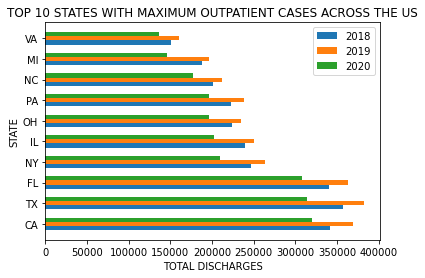

In [84]:
X = dfopdtc['Prv_State']
y = dfopdtc['TOT_DSCH_18']
z = dfopdtc['TOT_DSCH_19']
a = dfopdtc['TOT_DSCH_20']
  
Y_axis = np.arange(len(X))
  
plt.barh(Y_axis - 0.2, y, 0.2, label = '2018',align='center')
plt.barh(Y_axis, z, 0.2, label = '2019',align='center')
plt.barh(Y_axis + 0.2, a, 0.2, label = '2020',align='center')


plt.yticks(Y_axis, X)
plt.ylabel("STATE")
plt.xlabel("TOTAL DISCHARGES")
plt.title("TOP 10 STATES WITH MAXIMUM OUTPATIENT CASES ACROSS THE US")
plt.legend()
plt.show()

In [15]:
dfopdtd = dfopdt.sort_values(by = 'TOT_DSCH_20', ascending=True)
dfopdtd = dfopdtd.head(10)
dfopdtd

Prv_State  TOT_DSCH_18  TOT_DSCH_19  TOT_DSCH_20
49        AK       6656.0       7492.0       7256.0
48        WY       7814.0       8608.0       7586.0
46        VT      11715.0      12092.0      10079.0
47        HI      11149.0      12708.0      10550.0
45        RI      14603.0      14837.0      12001.0
44        DC      18416.0      18160.0      14110.0
43        DE      22032.0      23434.0      18199.0
39        NM      25325.0      26774.0      20350.0
38        ME      27535.0      27272.0      21407.0
41        ND      24505.0      24985.0      23150.0

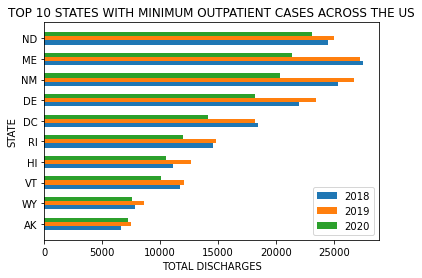

In [86]:
X = dfopdtd['Prv_State']
y = dfopdtd['TOT_DSCH_18']
z = dfopdtd['TOT_DSCH_19']
a = dfopdtd['TOT_DSCH_20']
  
Y_axis = np.arange(len(X))
  
plt.barh(Y_axis - 0.2, y, 0.2, label = '2018',align='center')
plt.barh(Y_axis, z, 0.2, label = '2019',align='center')
plt.barh(Y_axis + 0.2, a, 0.2, label = '2020',align='center')


plt.yticks(Y_axis, X)
plt.ylabel("STATE")
plt.xlabel("TOTAL DISCHARGES")
plt.title("TOP 10 STATES WITH MINIMUM OUTPATIENT CASES ACROSS THE US")
plt.legend()
plt.show()

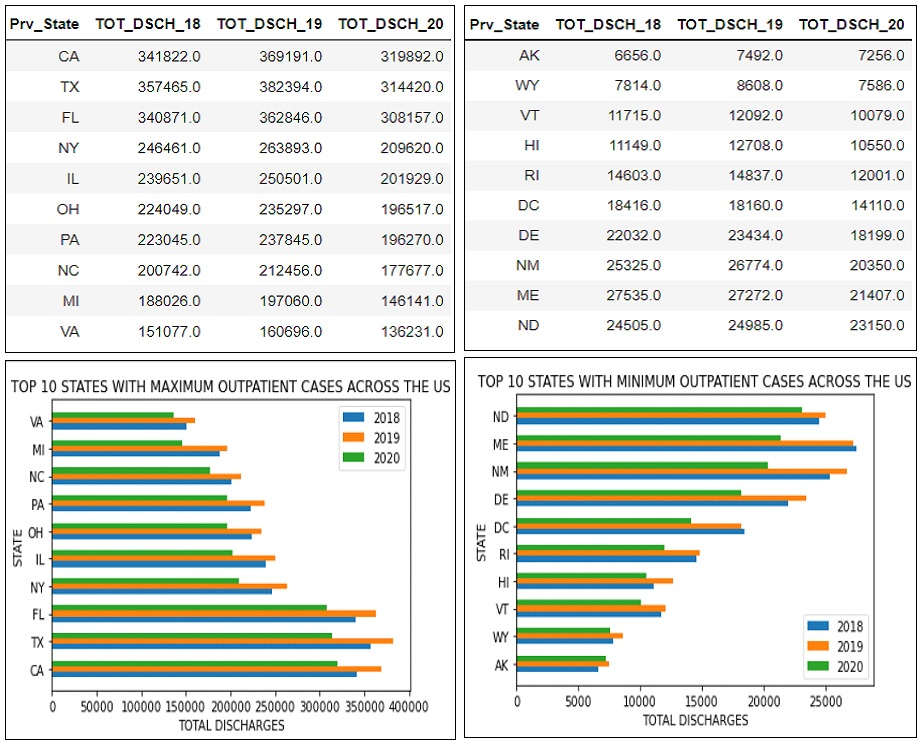

In [16]:
dfopdtan = pd.DataFrame().assign(Prv_State=dfopdtb['Prv_State'],TOT_DSCH_18=dfopdtb['Bene_Cnt_x'],TOT_DSCH_19=dfopdtb['Bene_Cnt_y'],TOT_DSCH_20=dfopdtb['Bene_Cnt'])
dfopdtan = dfopdtan.fillna(0)
opdc_long3=pd.melt(dfopdtan,id_vars=['Prv_State'],var_name='Year', value_name='Total_Patients')
opdc_long3

#Run One way ANOVA

modc = ols('Total_Patients ~ Year', data=opdc_long3).fit()
aov_table3c = sm.stats.anova_lm(modc, typ=2)
print("One way ANOVA with Year as IV")
print(aov_table3c)
print("")


mod2c = ols('Total_Patients ~ Prv_State', data=opdc_long3).fit()
aov_table4c = sm.stats.anova_lm(mod2c, typ=2)
print("One way ANOVA with State as IV")
print(aov_table4c)
print("")

#Run Tukey Post Hoc Test
tukeyc = pairwise_tukeyhsd(endog=opdc_long3['Total_Patients'],
                          groups=opdc_long3['Year'],
                          alpha=0.05)
print("Post Hoc Tukey for Year as IV")
print(tukeyc)
print("")

#Two way ANOVA

modelc = ols('Total_Patients ~ C(Prv_State) + C(Year) + C(Prv_State):C(Year)', data=opdc_long3).fit()
aov_tablec = sm.stats.anova_lm(modelc, type=2)
eta_squared(aov_tablec)
omega_squared(aov_tablec)
print("Two way ANOVA")
print(aov_tablec)


One way ANOVA with Year as IV
                sum_sq     df         F    PR(>F)
Year      8.828829e+09    2.0  0.557818  0.573664
Residual  1.163317e+12  147.0       NaN       NaN

One way ANOVA with State as IV
                 sum_sq     df           F        PR(>F)
Prv_State  1.155059e+12   49.0  137.961213  1.089856e-73
Residual   1.708642e+10  100.0         NaN           NaN

Post Hoc Tukey for Year as IV
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1      group2    meandiff p-adj    lower      upper   reject
--------------------------------------------------------------------
TOT_DSCH_18 TOT_DSCH_19   5897.68    0.9 -36231.092 48026.452  False
TOT_DSCH_18 TOT_DSCH_20  -12503.6 0.7427 -54632.372 29625.172  False
TOT_DSCH_19 TOT_DSCH_20 -18401.28 0.5532 -60530.052 23727.492  False
--------------------------------------------------------------------

Two way ANOVA
                        df        sum_sq       mean_sq    F  PR(>F)    eta_sq  \
C(Prv_S

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Nicole\AppData\Local\Temp/ipykernel_46088/666181714.py:9: RuntimeWarning:

divide by zero encountered in double_scalars



### CONCLUSION:

### As expected, there is a significant difference in outpatient services availed across different states.

### Q3. Most Expensive & Inexpensive Inpatient and Outpatient Conditions by Cost

In [14]:
df_ihp = pd.read_csv("Inpatient_2020_PrvSrv.csv")
df_ihp = pd.DataFrame(df_ihp)
df_ihp.head()

Prv_CCN                         Prv_Name              Prv_St_Adr Prv_City  \
0    10001  Southeast Health Medical Center  1108 Ross Clark Circle   Dothan   
1    10001  Southeast Health Medical Center  1108 Ross Clark Circle   Dothan   
2    10001  Southeast Health Medical Center  1108 Ross Clark Circle   Dothan   
3    10001  Southeast Health Medical Center  1108 Ross Clark Circle   Dothan   
4    10001  Southeast Health Medical Center  1108 Ross Clark Circle   Dothan   

  Prv_State  Prv_State_FIPS  Prv_Zip5  Prv_RUCA  \
0        AL               1     36301       1.0   
1        AL               1     36301       1.0   
2        AL               1     36301       1.0   
3        AL               1     36301       1.0   
4        AL               1     36301       1.0   

                                       Prv_RUCA_Desc  DRG_Cd  \
0  Metropolitan area core: primary flow within an...      23   
1  Metropolitan area core: primary flow within an...      24   
2  Metropolitan area core: primary flow within an...      25   
3  Metropolitan area core: primary flow within an...      27   
4  Metropolitan area core: primary flow within an...      38   

                                            DRG_Desc  Tot_Dschrgs  \
0  CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACUTE COM...           51   
1  CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...           16   
2  CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROCEDU...           30   
3  CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROCEDU...           11   
4                    EXTRACRANIAL PROCEDURES WITH CC           25   

   Avg_Sub_Cvrd_Chrg  Avg_Tot_Pyt_Amt  Avg_Mdcr_Pyt_Amt  
0        166625.8628      37033.31373       33908.45098  
1        105888.1250      26208.68750       22531.25000  
2        182686.3667      29491.53333       27775.50000  
3        117292.9091      15641.00000       14357.18182  
4        112528.6800      11398.56000        9559.28000

### Most Expensive Inpatient Services

In [15]:
ihpxp1 = pd.DataFrame().assign(DRG_Cd=df_ihp['DRG_Cd'],DRG_Desc=df_ihp['DRG_Desc'], MDR_AMT=df_ihp['Avg_Mdcr_Pyt_Amt'])
ihpxp_avg = ihpxp1.groupby(['DRG_Cd', 'DRG_Desc']).mean().reset_index()
ihpxp_max = ihpxp1.groupby(['DRG_Cd', 'DRG_Desc']).max().reset_index() 
ihpxp_min = ihpxp1.groupby(['DRG_Cd', 'DRG_Desc']).min().reset_index() 
ihpxp2 = pd.merge(ihpxp_avg, ihpxp_max, how='left', left_on=['DRG_Cd'], right_on = ['DRG_Cd'])
ihpxp3 = pd.merge(ihpxp2, ihpxp_min, how='left', left_on=['DRG_Cd'], right_on = ['DRG_Cd'])
ihpxp4 = pd.DataFrame().assign(DRG_Cd=ihpxp3['DRG_Cd'],DRG_Desc=ihpxp3['DRG_Desc_x'],AVG_COST=ihpxp3['MDR_AMT_x'],MAX_COST=ihpxp3['MDR_AMT_y'],MIN_COST=ihpxp3['MDR_AMT'])
ihpxp5 = ihpxp4.sort_values(by = 'MAX_COST', ascending=False)
ihpxp5 = ihpxp5.head(10)
ihpxp5

DRG_Cd                                           DRG_Desc       AVG_COST  \
445     813                              COAGULATION DISORDERS   14628.979239   
0         1  HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...  255544.726148   
1         3  "ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRI...  152122.672154   
510     927  EXTENSIVE BURNS OR FULL THICKNESS BURNS WITH M...  349798.000000   
227     356    OTHER DIGESTIVE SYSTEM O.R. PROCEDURES WITH MCC   33211.872070   
3         5  LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...  102392.048480   
2         4  TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NE...   91504.487837   
11       16  AUTOLOGOUS BONE MARROW TRANSPLANT W CC/MCC OR ...   94412.975591   
289     469  MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTA...   21199.387356   
5         7                                    LUNG TRANSPLANT  120612.778390   

        MAX_COST       MIN_COST  
445  514643.5000    7370.866667  
0    472611.5000  137219.941200  
1    434265.0313   61340.727270  
510  349798.0000  349798.000000  
227  322033.3044   18389.727270  
3    287812.8000   61194.052630  
2    273659.3889   36743.636360  
11   267470.0909   35118.333330  
289  251497.9600   10539.916670  
5    217216.8824   69232.642860

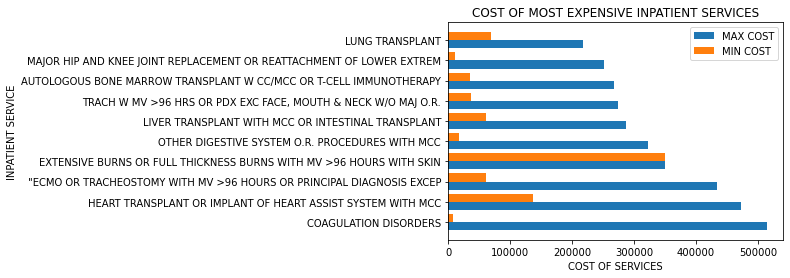

In [89]:
# Most expensive Inpatient Services
X = ihpxp5 ['DRG_Desc']
y = ihpxp5 ['MAX_COST']
z = ihpxp5 ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("INPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST EXPENSIVE INPATIENT SERVICES")
plt.legend()
plt.show()

### Most Inexpensive Inpatient Services

In [16]:
ihpxp5a = ihpxp4.sort_values(by = 'MIN_COST', ascending=True)
ihpxp5a = ihpxp5a.head(10)
ihpxp5a

DRG_Cd                                           DRG_Desc      AVG_COST  \
268     440  DISORDERS OF PANCREAS EXCEPT MALIGNANCY WITHOU...   3684.356837   
200     310  CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS W/O ...   3210.058064   
248     390                        G.I. OBSTRUCTION W/O CC/MCC   3393.918026   
478     866                          VIRAL ILLNESS WITHOUT MCC   6540.025322   
420     708            MAJOR MALE PELVIC PROCEDURES W/O CC/MCC   8410.328879   
330     542  PATHOLOGICAL FRACTURES & MUSCULOSKELET & CONN ...  13582.131586   
522     951            OTHER FACTORS INFLUENCING HEALTH STATUS   4343.383459   
187     293             HEART FAILURE AND SHOCK WITHOUT CC/MCC   4446.332305   
120     195       SIMPLE PNEUMONIA AND PLEURISY WITHOUT CC/MCC   4116.938130   
119     194                   SIMPLE PNEUMONIA & PLEURISY W CC   5862.633337   

        MAX_COST     MIN_COST  
268  10047.75000  1178.600000  
200  30980.87500  1338.076923  
248  13571.00000  1602.090909  
478  13777.18182  1739.384615  
420  14605.92308  1763.416667  
330  43368.88889  1765.272727  
522  14914.27273  1782.000000  
187  39592.78571  1869.266667  
120  15506.07143  1901.181818  
119  41151.47059  1903.769231

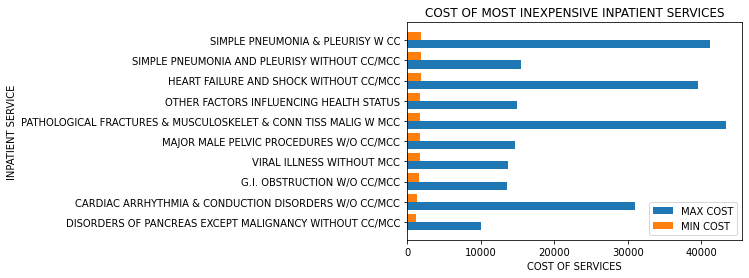

In [91]:
# Most expensive Inpatient Services
X = ihpxp5a ['DRG_Desc']
y = ihpxp5a ['MAX_COST']
z = ihpxp5a ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("INPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST INEXPENSIVE INPATIENT SERVICES")
plt.legend()
plt.show()

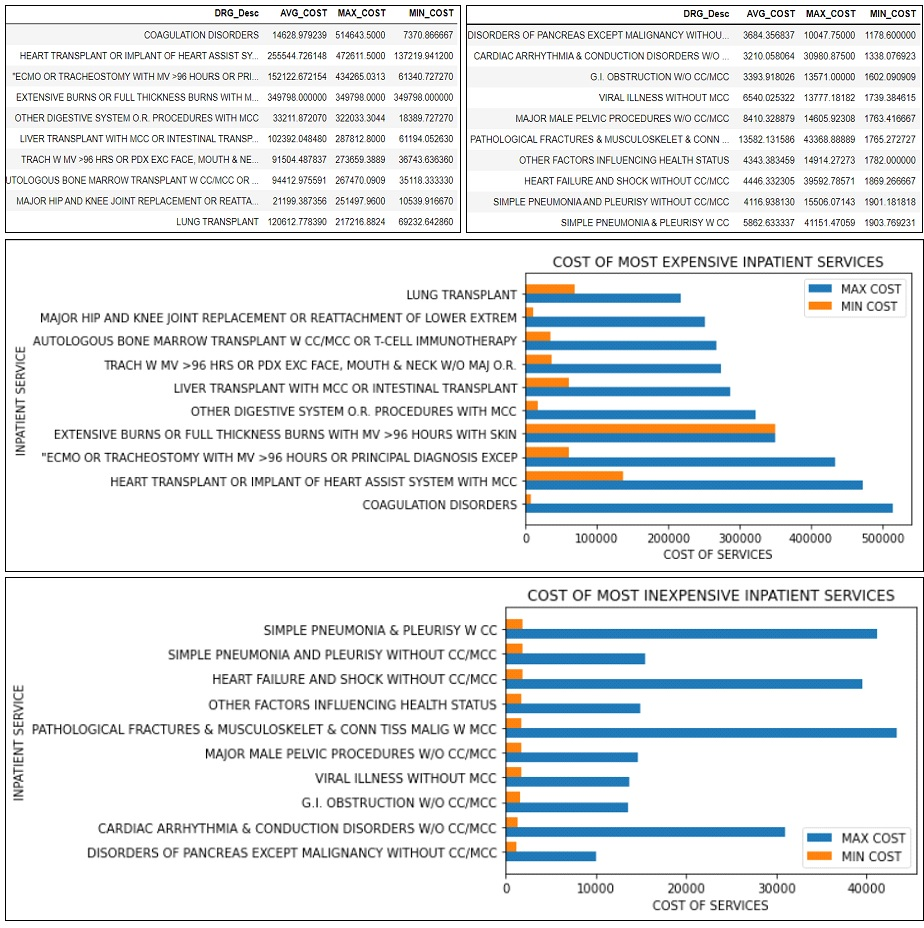

In [17]:
ihpxp4a = pd.DataFrame().assign(DRG_Cd=ihpxp3['DRG_Cd'],MAX_COST=ihpxp3['MDR_AMT_y'],MIN_COST=ihpxp3['MDR_AMT'])

ihpxp4a = ihpxp4a.fillna(0)
ihpc_long4=pd.melt(ihpxp4a,id_vars=['DRG_Cd'],var_name='Cost', value_name='Mdr_Amt')
ihpc_long4
#ihpc_long4.info()


#Run One way ANOVA
#Method 1
mod5 = ols('Mdr_Amt ~ Cost', data=ihpc_long4).fit()
aov_table5 = sm.stats.anova_lm(mod5, typ=2)
print("One way ANOVA with Cost as IV")
print(aov_table5)
print("")

mod5a = ols('Mdr_Amt ~ DRG_Cd', data=ihpc_long4).fit()
aov_table5a = sm.stats.anova_lm(mod5a, typ=2)
print("One way ANOVA with DRG_Cd as IV")
print(aov_table5a)
print("")


#Run Tukey Post Hoc Test

tukey5a = pairwise_tukeyhsd(endog=ihpc_long4['Mdr_Amt'],
                          groups=ihpc_long4['Cost'],
                          alpha=0.05)
print("Post Hoc Tukey for Cost as IV")
print(tukey5a)

#perform two-way ANOVA

model5b = ols('Mdr_Amt ~ C(DRG_Cd) + C(Cost) + C(DRG_Cd):C(Cost)', data=ihpc_long4).fit()
aov_table5b = sm.stats.anova_lm(model5b, type=2)
eta_squared(aov_table5b)
omega_squared(aov_table5b)
print("Two way ANOVA")
print(aov_table5b)

One way ANOVA with Cost as IV
                sum_sq      df           F        PR(>F)
Cost      3.272097e+11     1.0  193.741363  1.334563e-40
Residual  1.807123e+12  1070.0         NaN           NaN

One way ANOVA with DRG_Cd as IV
                sum_sq      df         F    PR(>F)
DRG_Cd    1.081550e+10     1.0  5.449726  0.019756
Residual  2.123517e+12  1070.0       NaN       NaN

Post Hoc Tukey for Cost as IV
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1   group2    meandiff  p-adj    lower       upper    reject
------------------------------------------------------------------
MAX_COST MIN_COST -34941.8341 0.001 -39867.6043 -30016.0639   True
------------------------------------------------------------------
Two way ANOVA
                      df        sum_sq       mean_sq    F  PR(>F)    eta_sq  \
C(DRG_Cd)          535.0  1.213318e+12  2.267885e+09  0.0     NaN  0.568477   
C(Cost)              1.0  3.272097e+11  3.272097e+11  0.0     NaN  0.153308

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Nicole\AppData\Local\Temp/ipykernel_8460/666181714.py:9: RuntimeWarning:

divide by zero encountered in double_scalars



### CONCLUSION:
    
### There is a significant difference in the cost of outpatient services availed in different states across the US.

### Difference in Cost of Most Frequently used Inpatient Services in the US

In [18]:
ihpxp6 = pd.DataFrame().assign(DRG_Cd=df_ihp['DRG_Cd'],DRG_Desc=df_ihp['DRG_Desc'], PT_CT=df_ihp['Tot_Dschrgs'])
ihpxp_pt = ihpxp6.groupby(['DRG_Cd', 'DRG_Desc']).sum()
ihpxp7 = pd.merge(ihpxp4, ihpxp_pt, how='left', left_on=['DRG_Cd'], right_on = ['DRG_Cd'])
ihpxp8 = pd.DataFrame().assign(DRG_Cd=ihpxp7['DRG_Cd'],DRG_Desc=ihpxp7['DRG_Desc'],AVG_COST=ihpxp7['AVG_COST'],MAX_COST=ihpxp7['MAX_COST'],MIN_COST=ihpxp7['MIN_COST'],PT_CT=ihpxp7['PT_CT'])
ihpxp8 = ihpxp8.sort_values(by = 'PT_CT', ascending=False)
ihpxp9 = ihpxp8.head(10)
ihpxp9

DRG_Cd                                           DRG_Desc      AVG_COST  \
482     871  SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W...  13207.017921   
185     291                   HEART FAILURE AND SHOCK WITH MCC   9464.774300   
290     470  MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTA...  12642.580565   
104     177  RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC  14262.636187   
118     193             SIMPLE PNEUMONIA AND PLEURISY WITH MCC   9031.074865   
483     872  SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...   7010.971199   
114     189            PULMONARY EDEMA AND RESPIRATORY FAILURE   8717.984068   
238     378                               G.I. HEMORRHAGE W CC   6618.578187   
250     392  ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS...   5044.127385   
412     690          KIDNEY & URINARY TRACT INFECTIONS W/O MCC   5311.695213   

         MAX_COST     MIN_COST   PT_CT  
482  128523.50000  7047.375000  586558  
185  124468.50000  4961.505747  329977  
290   58973.73333  5747.428571  268571  
104  126805.30000  6765.894737  179339  
118   45044.33333  4266.873418  128737  
483  121897.31250  2778.571429  125785  
114  128772.18180  4685.357143  106791  
238   42308.30769  2318.608696  103754  
250   40759.18182  2053.000000  102085  
412   44546.75000  2670.933333   95036

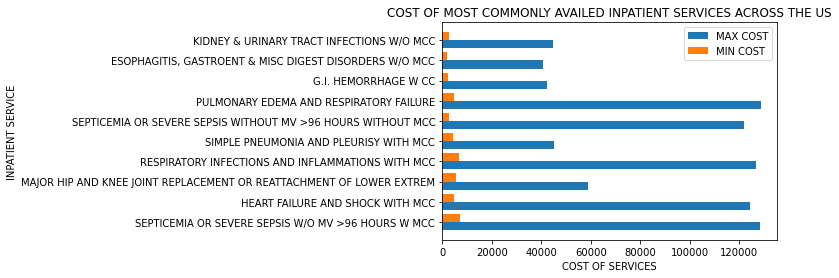

In [96]:
# Difference in Cost of Most Frequently used Inpatient Services in the US

X = ihpxp9 ['DRG_Desc']
y = ihpxp9 ['MAX_COST']
z = ihpxp9 ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("INPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST COMMONLY AVAILED INPATIENT SERVICES ACROSS THE US")
plt.legend()
plt.show()
             

In [20]:
ihpxp8a = ihpxp8.sort_values(by = 'PT_CT', ascending=True)
ihpxp9a = ihpxp8a.head(10)
ihpxp9a

DRG_Cd                                           DRG_Desc      AVG_COST  \
508     922  "OTHER INJURY, POISONING AND TOXIC EFFECT DIAG...  12058.454550   
484     876  O.R. PROCEDURE W PRINCIPAL DIAGNOSES OF MENTAL...  41345.818180   
376     622  "SKIN GRAFTS AND WOUND DEBRIDEMENT FOR ENDOCRI...  61579.454550   
325     534                         FRACTURES OF FEMUR W/O MCC   6994.545455   
236     376                    DIGESTIVE MALIGNANCY W/O CC/MCC  12129.454550   
155     245                          AICD GENERATOR PROCEDURES  33121.727270   
436     754  "MALIGNANCY, FEMALE REPRODUCTIVE SYSTEM WITH MCC"  13551.454550   
218     339     APPENDECTOMY W COMPLICATED PRINCIPAL DIAG W CC  13173.363640   
515     940  O.R. PROC W DIAGNOSES OF OTHER CONTACT W HEALT...  20863.272730   
85      137                          MOUTH PROCEDURES W CC/MCC  11198.636360   

         MAX_COST      MIN_COST  PT_CT  
508  12058.454550  12058.454550     11  
484  41345.818180  41345.818180     11  
376  61579.454550  61579.454550     11  
325   6994.545455   6994.545455     11  
236  12129.454550  12129.454550     11  
155  33121.727270  33121.727270     11  
436  13551.454550  13551.454550     11  
218  13173.363640  13173.363640     11  
515  20863.272730  20863.272730     11  
85   11198.636360  11198.636360     11

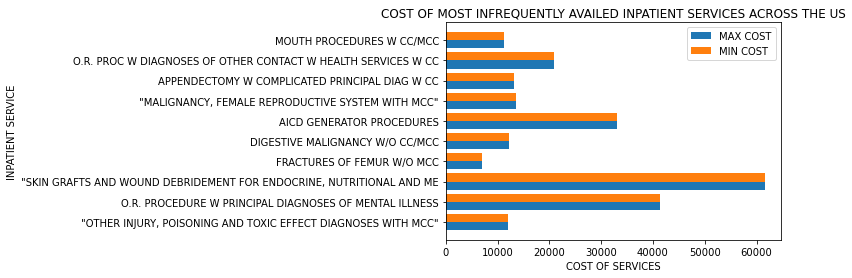

In [97]:
# Difference in Cost of Most InFrequently used Inpatient Services in the US

X = ihpxp9a ['DRG_Desc']
y = ihpxp9a ['MAX_COST']
z = ihpxp9a ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("INPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST INFREQUENTLY AVAILED INPATIENT SERVICES ACROSS THE US")
plt.legend()
plt.show()

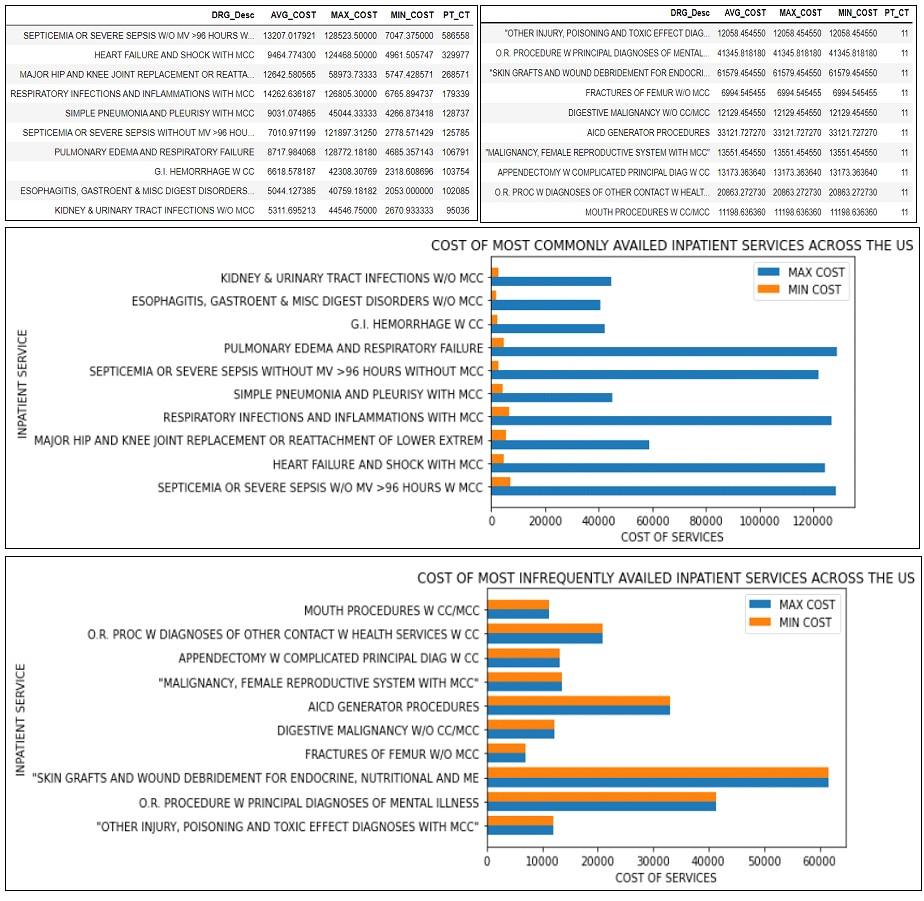

In [19]:
ihpxp8a = pd.DataFrame().assign(DRG_Cd=ihpxp7['DRG_Cd'],MAX_COST=ihpxp7['MAX_COST'],MIN_COST=ihpxp7['MIN_COST'])

ihpxp8a = ihpxp8a.fillna(0)
ihpc_long8=pd.melt(ihpxp8a,id_vars=['DRG_Cd'],var_name='Cost', value_name='Mdr_Amt')
ihpc_long8
#ihpc_long8.info()


#Run One way ANOVA
#Method 1
mod6 = ols('Mdr_Amt ~ Cost', data=ihpc_long8).fit()
aov_table6 = sm.stats.anova_lm(mod6, typ=2)
print("One way ANOVA with Cost as IV")
print(aov_table6)
print("")

mod6a = ols('Mdr_Amt ~ DRG_Cd', data=ihpc_long8).fit()
aov_table6a = sm.stats.anova_lm(mod6a, typ=2)
print("One way ANOVA with DRG_Cd as IV")
print(aov_table6a)
print("")


#Run Tukey Post Hoc Test

tukey6a = pairwise_tukeyhsd(endog=ihpc_long8['Mdr_Amt'],
                          groups=ihpc_long8['Cost'],
                          alpha=0.05)
print("Post Hoc Tukey for Cost as IV")
print(tukey6a)

#perform two-way ANOVA

model6b = ols('Mdr_Amt ~ C(DRG_Cd) + C(Cost) + C(DRG_Cd):C(Cost)', data=ihpc_long8).fit()
aov_table6b = sm.stats.anova_lm(model6b, type=2)
eta_squared(aov_table6b)
omega_squared(aov_table6b)
print("Two way ANOVA")
print(aov_table6b)

One way ANOVA with Cost as IV
                sum_sq      df           F        PR(>F)
Cost      3.272097e+11     1.0  193.741363  1.334563e-40
Residual  1.807123e+12  1070.0         NaN           NaN

One way ANOVA with DRG_Cd as IV
                sum_sq      df         F    PR(>F)
DRG_Cd    1.081550e+10     1.0  5.449726  0.019756
Residual  2.123517e+12  1070.0       NaN       NaN

Post Hoc Tukey for Cost as IV
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1   group2    meandiff  p-adj    lower       upper    reject
------------------------------------------------------------------
MAX_COST MIN_COST -34941.8341 0.001 -39867.6043 -30016.0639   True
------------------------------------------------------------------
Two way ANOVA
                      df        sum_sq       mean_sq    F  PR(>F)    eta_sq  \
C(DRG_Cd)          535.0  1.213318e+12  2.267885e+09  0.0     NaN  0.568477   
C(Cost)              1.0  3.272097e+11  3.272097e+11  0.0     NaN  0.153308

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Nicole\AppData\Local\Temp/ipykernel_8460/666181714.py:9: RuntimeWarning:

divide by zero encountered in double_scalars



### CONCLUSION:
    
### There is a significant difference in the cost of the most frequently availed inpatient services across the US, however this difference cannot be seen for the least availed services

### Difference in Cost of Most Frequently used Inpatient Services in Indiana State

In [21]:
dfihp_ct=df_ihp[df_ihp['Prv_State']== 'IN']
dfihp_ct.head()
ihpxpa = pd.DataFrame().assign(DRG_Cd=dfihp_ct['DRG_Cd'],DRG_Desc=dfihp_ct['DRG_Desc'], MDR_AMT=dfihp_ct['Avg_Mdcr_Pyt_Amt'])
ihpxp_avga = ihpxpa.groupby(['DRG_Cd', 'DRG_Desc']).mean().reset_index()
ihpxp_maxa = ihpxpa.groupby(['DRG_Cd', 'DRG_Desc']).max().reset_index() 
ihpxp_mina = ihpxpa.groupby(['DRG_Cd', 'DRG_Desc']).min().reset_index() 
ihpxpb = pd.merge(ihpxp_avga, ihpxp_maxa, how='left', left_on=['DRG_Cd'], right_on = ['DRG_Cd'])
ihpxpc = pd.merge(ihpxpb, ihpxp_mina, how='left', left_on=['DRG_Cd'], right_on = ['DRG_Cd'])
ihpxpd = pd.DataFrame().assign(DRG_Cd=ihpxpc['DRG_Cd'],DRG_Desc=ihpxpc['DRG_Desc_x'],AVG_COST=ihpxpc['MDR_AMT_x'],MAX_COST=ihpxpc['MDR_AMT_y'],MIN_COST=ihpxpc['MDR_AMT'])

ihpxpf = pd.DataFrame().assign(DRG_Cd=dfihp_ct['DRG_Cd'],DRG_Desc=dfihp_ct['DRG_Desc'], PT_CT=dfihp_ct['Tot_Dschrgs'])
ihpxp_pta = ihpxpf.groupby(['DRG_Cd', 'DRG_Desc']).sum()
ihpxpg = pd.merge(ihpxpd, ihpxp_pta, how='left', left_on=['DRG_Cd'], right_on = ['DRG_Cd'])
ihpxph = pd.DataFrame().assign(DRG_Cd=ihpxpg['DRG_Cd'],DRG_Desc=ihpxpg['DRG_Desc'],AVG_COST=ihpxpg['AVG_COST'],MAX_COST=ihpxpg['MAX_COST'],MIN_COST=ihpxpg['MIN_COST'],PT_CT=ihpxpg['PT_CT'])
ihpxph = ihpxph.sort_values(by = 'PT_CT', ascending=False)
ihpxpi = ihpxph.head(10)
ihpxpi

DRG_Cd                                           DRG_Desc      AVG_COST  \
289     871  SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W...  11798.090810   
119     291                   HEART FAILURE AND SHOCK WITH MCC   8518.293726   
198     470  MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTA...  11820.155247   
68      193             SIMPLE PNEUMONIA AND PLEURISY WITH MCC   8379.005069   
59      177  RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC  12892.155292   
64      189            PULMONARY EDEMA AND RESPIRATORY FAILURE   7811.008278   
290     872  SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...   6301.135491   
153     378                               G.I. HEMORRHAGE W CC   6116.092537   
256     683                                 RENAL FAILURE W CC   5569.016809   
65      190        CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC   7183.107061   

        MAX_COST     MIN_COST  PT_CT  
289  21061.62500  9556.230769  12696  
119  16925.02740  6424.650000   8889  
198  20794.39286  8410.472973   7195  
68   16671.55556  6398.086957   4106  
59   22538.55738  9974.367347   3872  
64   15831.57658  6302.724138   2928  
290  13684.57576  5035.426667   2745  
153  13402.48485  4954.940000   2735  
256  13085.14894  4026.045455   2655  
65   14586.82143  5304.338235   2630

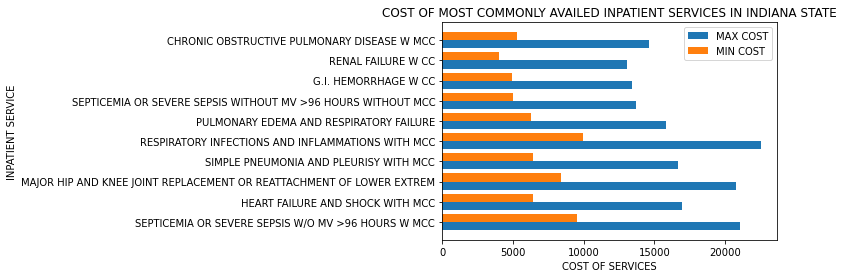

In [99]:
# Difference in Cost of Most Frequently used Inpatient Services in Indiana State

X = ihpxpi ['DRG_Desc']
y = ihpxpi ['MAX_COST']
z = ihpxpi ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("INPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST COMMONLY AVAILED INPATIENT SERVICES IN INDIANA STATE")
plt.legend()
plt.show()

In [23]:
ihpxpha = ihpxph.sort_values(by = 'PT_CT', ascending=True)
ihpxpia = ihpxpha.head(10)
ihpxpia

DRG_Cd                                           DRG_Desc      AVG_COST  \
292     882                         NEUROSES EXCEPT DEPRESSIVE   4861.818182   
225     562  FX, SPRN, STRN & DISL EXCEPT FEMUR, HIP, PELVI...   6713.363636   
99      250  PERCUTANEOUS CARDIOVASCULAR PROCEDURES WITHOUT...  16013.727270   
208     486            KNEE PROCEDURES W PDX OF INFECTION W CC  17357.363640   
110     272  OTHER MAJOR CARDIOVASCULAR PROCEDURES WITHOUT ...  22046.818180   
310     958  OTHER O.R. PROCEDURES FOR MULTIPLE SIGNIFICANT...  33720.727270   
48      130            MAJOR HEAD & NECK PROCEDURES W/O CC/MCC  11249.000000   
304     921              COMPLICATIONS OF TREATMENT W/O CC/MCC   5964.727273   
49      131                 CRANIAL/FACIAL PROCEDURES W CC/MCC  24085.727270   
252     669                      TRANSURETHRAL PROCEDURES W CC   8742.363636   

         MAX_COST      MIN_COST  PT_CT  
292   4861.818182   4861.818182     11  
225   6713.363636   6713.363636     11  
99   16013.727270  16013.727270     11  
208  17357.363640  17357.363640     11  
110  22046.818180  22046.818180     11  
310  33720.727270  33720.727270     11  
48   11249.000000  11249.000000     11  
304   5964.727273   5964.727273     11  
49   24085.727270  24085.727270     11  
252   8742.363636   8742.363636     11

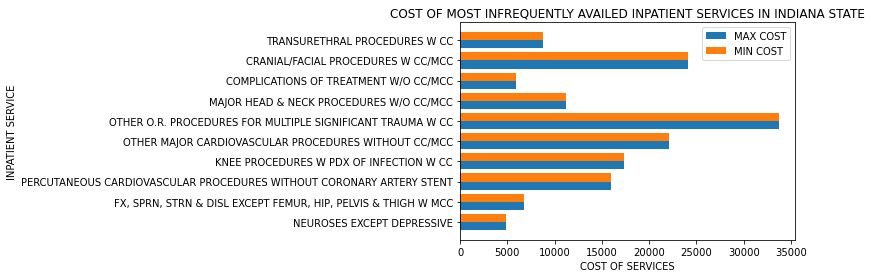

In [102]:
#Difference in Cost of Most Frequently used Inpatient Services in Indiana State

X = ihpxpia ['DRG_Desc']
y = ihpxpia ['MAX_COST']
z = ihpxpia ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("INPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST INFREQUENTLY AVAILED INPATIENT SERVICES IN INDIANA STATE")
plt.legend()
plt.show()

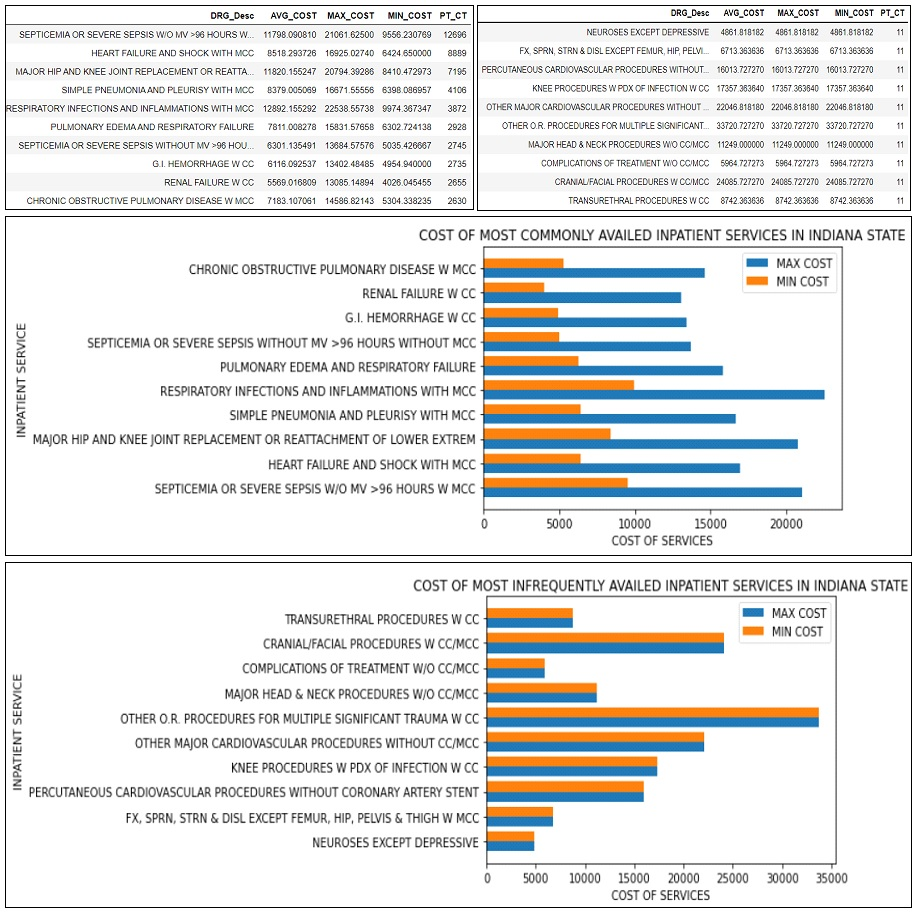

In [22]:
ihpxp9a = pd.DataFrame().assign(DRG_Cd=ihpxpg['DRG_Cd'],MAX_COST=ihpxpg['MAX_COST'],MIN_COST=ihpxpg['MIN_COST'])

ihpxp9a = ihpxp9a.fillna(0)
ihpc_long9=pd.melt(ihpxp9a,id_vars=['DRG_Cd'],var_name='Cost', value_name='Mdr_Amt')
ihpc_long9
#ihpc_long9.info()


#Run One way ANOVA
#Method 1
mod7 = ols('Mdr_Amt ~ Cost', data=ihpc_long9).fit()
aov_table7 = sm.stats.anova_lm(mod7, typ=2)
print("One way ANOVA with Cost as IV")
print(aov_table7)
print("")

mod7a = ols('Mdr_Amt ~ DRG_Cd', data=ihpc_long9).fit()
aov_table7a = sm.stats.anova_lm(mod7a, typ=2)
print("One way ANOVA with DRG_Cd as IV")
print(aov_table7a)
print("")


#Run Tukey Post Hoc Test

tukey7a = pairwise_tukeyhsd(endog=ihpc_long9['Mdr_Amt'],
                          groups=ihpc_long9['Cost'],
                          alpha=0.05)
print("Post Hoc Tukey for Cost as IV")
print(tukey7a)

#perform two-way ANOVA

model7b = ols('Mdr_Amt ~ C(DRG_Cd) + C(Cost) + C(DRG_Cd):C(Cost)', data=ihpc_long9).fit()
aov_table7b = sm.stats.anova_lm(model7b, type=2)
eta_squared(aov_table7b)
omega_squared(aov_table7b)
print("Two way ANOVA")
print(aov_table7b)

One way ANOVA with Cost as IV
                sum_sq     df          F    PR(>F)
Cost      1.604075e+10    1.0  14.745798  0.000135
Residual  6.831498e+11  628.0        NaN       NaN

One way ANOVA with DRG_Cd as IV
                sum_sq     df         F    PR(>F)
DRG_Cd    4.539040e+09    1.0  4.103521  0.043216
Residual  6.946515e+11  628.0       NaN       NaN

Post Hoc Tukey for Cost as IV
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2    meandiff  p-adj    lower      upper    reject
-----------------------------------------------------------------
MAX_COST MIN_COST -10091.8785 0.001 -15252.7587 -4930.9984   True
-----------------------------------------------------------------
Two way ANOVA
                      df        sum_sq       mean_sq    F  PR(>F)    eta_sq  \
C(DRG_Cd)          314.0  4.747121e+11  1.511822e+09  0.0     NaN  0.678945   
C(Cost)              1.0  1.604075e+10  1.604075e+10  0.0     NaN  0.022942   
C(DRG_Cd):C(Cost)  314

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Nicole\AppData\Local\Temp/ipykernel_8460/666181714.py:9: RuntimeWarning:

divide by zero encountered in double_scalars



### CONCLUSION:

### The significant difference in the cost of inpatient services that are seen at the State level, while evident in case of the most expensive services cannot be seen for the most infrequently availed services offered in the State of Indiana

### Most Expensive & Inexpensive Outpatient Services

In [24]:
df_opd = pd.read_csv("Outpatient_2020_PrvSrv.csv")
df_opd = pd.DataFrame(df_opd)
df_opd.head()

Prv_CCN                         Prv_Name              Prv_St_Adr Prv_City  \
0    10001  Southeast Health Medical Center  1108 Ross Clark Circle   Dothan   
1    10001  Southeast Health Medical Center  1108 Ross Clark Circle   Dothan   
2    10001  Southeast Health Medical Center  1108 Ross Clark Circle   Dothan   
3    10001  Southeast Health Medical Center  1108 Ross Clark Circle   Dothan   
4    10001  Southeast Health Medical Center  1108 Ross Clark Circle   Dothan   

  Prv_State  Prv_State_FIPS  Prv_Zip5  Prv_RUCA  \
0        AL               1     36301       1.0   
1        AL               1     36301       1.0   
2        AL               1     36301       1.0   
3        AL               1     36301       1.0   
4        AL               1     36301       1.0   

                                       Prv_RUCA_Desc  APC_Cd  \
0  Metropolitan area core: primary flow within an...    5072   
1  Metropolitan area core: primary flow within an...    5073   
2  Metropolitan area core: primary flow within an...    5091   
3  Metropolitan area core: primary flow within an...    5092   
4  Metropolitan area core: primary flow within an...    5112   

                                            APC_Desc  Bene_Cnt  CAPC_Srvcs  \
0    Level 2 Excision/ Biopsy/ Incision and Drainage     155.0       167.0   
1    Level 3 Excision/ Biopsy/ Incision and Drainage      37.0        40.0   
2  Level 1 Breast/Lymphatic Surgery and Related P...      24.0        25.0   
3  Level 2 Breast/Lymphatic Surgery and Related P...      18.0        18.0   
4                 Level 2 Musculoskeletal Procedures      15.0        16.0   

   Avg_Tot_Sbmtd_Chrgs  Avg_Mdcr_Alowd_Amt  Avg_Mdcr_Pymt_Amt  Outlier_Srvcs  \
0          10371.80994         1282.459042        1020.327305            0.0   
1          21234.22125         2192.863500        1751.727000            0.0   
2          24982.15840         2883.336800        2304.165200            0.0   
3          33303.68778         4964.942222        3965.896667            0.0   
4          11867.73750         1291.838750        1031.941875            0.0   

   Avg_Mdcr_Outlier_Amt  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

In [25]:
opdxp1 = pd.DataFrame().assign(APC_Cd=df_opd['APC_Cd'],APC_Desc=df_opd['APC_Desc'], MDR_AMT=df_opd['Avg_Mdcr_Pymt_Amt'])
opdxp_avg = opdxp1.groupby(['APC_Cd', 'APC_Desc']).mean().reset_index()
opdxp_max = opdxp1.groupby(['APC_Cd', 'APC_Desc']).max().reset_index() 
opdxp_min = opdxp1.groupby(['APC_Cd', 'APC_Desc']).min().reset_index() 
opdxp2 = pd.merge(opdxp_avg, opdxp_max, how='left', left_on=['APC_Cd'], right_on = ['APC_Cd'])
opdxp3 = pd.merge(opdxp2, opdxp_min, how='left', left_on=['APC_Cd'], right_on = ['APC_Cd'])
opdxp4 = pd.DataFrame().assign(APC_Cd=opdxp3['APC_Cd'],APC_Desc=opdxp3['APC_Desc_x'],AVG_COST=opdxp3['MDR_AMT_x'],MAX_COST=opdxp3['MDR_AMT_y'],MIN_COST=opdxp3['MDR_AMT'])
opdxp5 = opdxp4.sort_values(by = 'MAX_COST', ascending=False)
opdxp5 = opdxp5.head(10)
opdxp5

APC_Cd                                           APC_Desc      AVG_COST  \
34    5244  Level 4 Blood Product Exchange and Related Ser...  43148.735330   
33    5232                 Level 2 ICD and Similar Procedures  30404.307744   
17    5166                         Cochlear Implant Procedure  31393.967717   
55    5464     Level 4 Neurostimulator and Related Procedures  26744.634306   
25    5200          Implantation Wireless PA Pressure Monitor  27200.471956   
32    5231                 Level 1 ICD and Similar Procedures  20564.778809   
28    5213              Level 3 Electrophysiologic Procedures  18873.478655   
54    5463     Level 3 Neurostimulator and Related Procedures  17229.573373   
31    5224           Level 4 Pacemaker and Similar Procedures  16621.240271   
46    5377               Level 7 Urology and Related Services  15967.268109   

       MAX_COST      MIN_COST  
34  53797.48111  37281.325380  
33  47202.43714  10629.669570  
17  47138.92533  22172.113460  
55  41360.32909  14485.755290  
25  33072.17222  23396.994620  
32  31116.52333  15584.710000  
28  29190.57909  10957.967580  
54  27005.59500   1481.284167  
31  26055.52400   7801.705333  
46  24427.88520  10646.997330

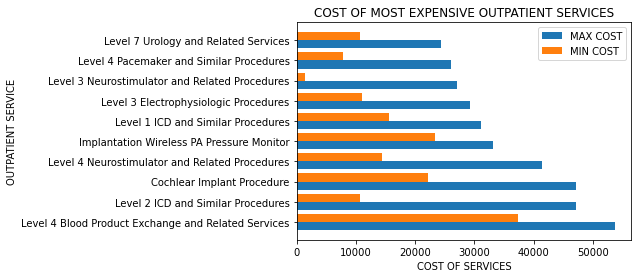

In [108]:
# Most expensive Outpatient Services


X = opdxp5 ['APC_Desc']
y = opdxp5 ['MAX_COST']
z = opdxp5 ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("OUTPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST EXPENSIVE OUTPATIENT SERVICES")
plt.legend()
plt.show()

In [106]:
opdxp5a = opdxp4.sort_values(by = 'MIN_COST', ascending=True)
opdxp5a = opdxp5a.head(10)
opdxp5a

APC_Cd                                           APC_Desc     AVG_COST  \
66    8011                 Comprehensive Observation Services  1806.915184   
57    5491                     Level 1 Intraocular Procedures  1588.503748   
6     5112                 Level 2 Musculoskeletal Procedures  1061.315362   
50    5431                           Level 1 Nerve Procedures  1327.709931   
39    5341  Abdominal/Peritoneal/Biliary and Related Proce...  2451.358092   
7     5113                 Level 3 Musculoskeletal Procedures  2120.491018   
14    5163                             Level 3 ENT Procedures  1028.782878   
0     5072    Level 2 Excision/ Biopsy/ Incision and Drainage  1075.794201   
3     5092  Level 2 Breast/Lymphatic Surgery and Related P...  4158.144328   
18    5182                        Level 2 Vascular Procedures  1283.369533   

       MAX_COST    MIN_COST  
66  3065.105484   59.127656  
57  2415.983542  276.484743  
6   1632.547429  296.098294  
50  2019.853333  302.410098  
39  3748.646000  357.724615  
7   3293.504884  426.695663  
14  1586.534286  435.148718  
0   1657.125652  437.400057  
3   6494.608333  442.573409  
18  1970.639048  460.382750

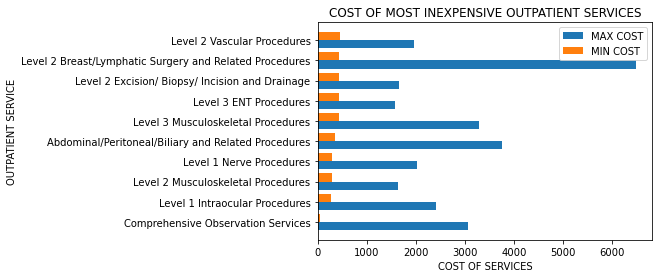

In [107]:
# Most inexpensive Outpatient Services

X = opdxp5a ['APC_Desc']
y = opdxp5a ['MAX_COST']
z = opdxp5a ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("OUTPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST INEXPENSIVE OUTPATIENT SERVICES")
plt.legend()
plt.show()
                          

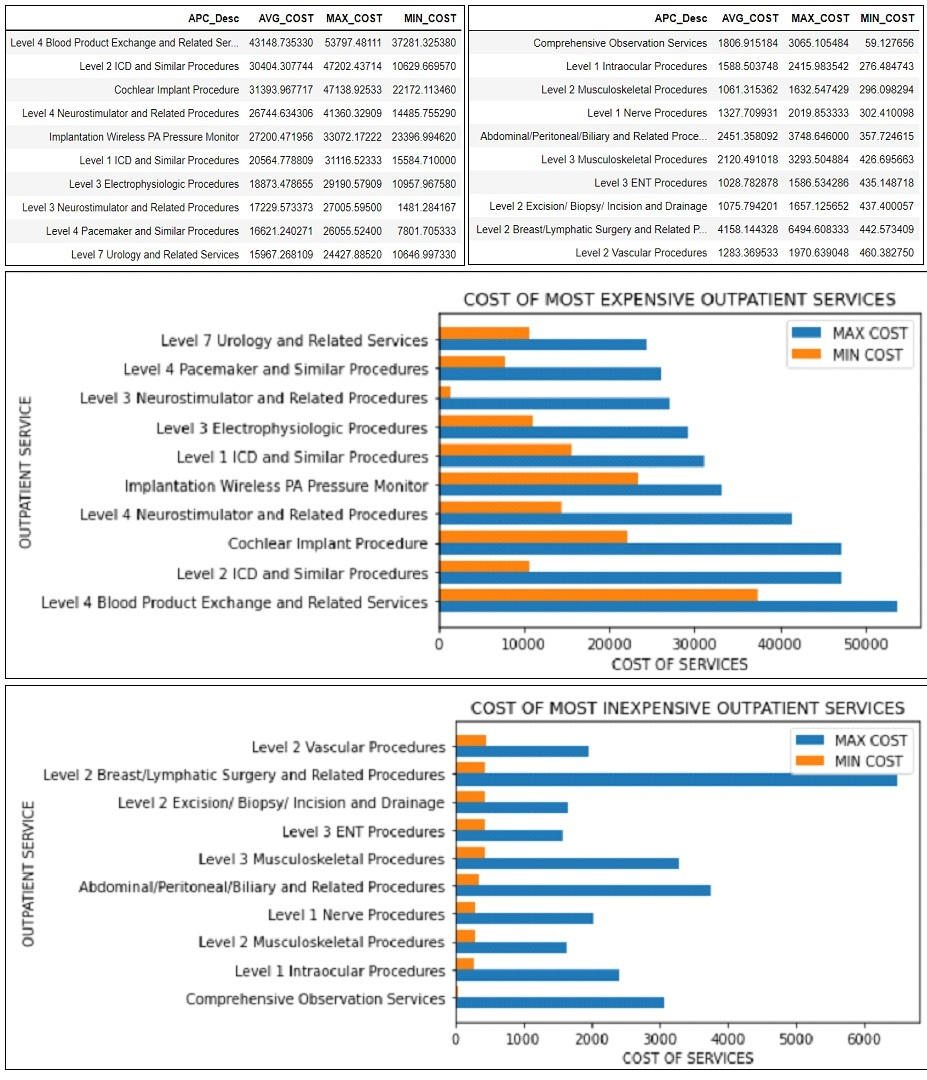

In [26]:
opdxp4a = pd.DataFrame().assign(APC_Cd=opdxp3['APC_Cd'],MAX_COST=opdxp3['MDR_AMT_y'],MIN_COST=opdxp3['MDR_AMT'])

opdxp = opdxp4a.fillna(0)
opdc_long=pd.melt(opdxp,id_vars=['APC_Cd'],var_name='Cost', value_name='Mdr_Amt')
opdc_long
#opdc_long.info()


#Run One way ANOVA
#Method 1
mod8 = ols('Mdr_Amt ~ Cost', data=opdc_long).fit()
aov_table8 = sm.stats.anova_lm(mod8, typ=2)
print("One way ANOVA with Cost as IV")
print(aov_table8)
print("")

mod8a = ols('Mdr_Amt ~ APC_Cd', data=opdc_long).fit()
aov_table8a = sm.stats.anova_lm(mod8a, typ=2)
print("One way ANOVA with APC_Cd as IV")
print(aov_table8a)
print("")


#Run Tukey Post Hoc Test

tukey8a = pairwise_tukeyhsd(endog=opdc_long['Mdr_Amt'],
                          groups=opdc_long['Cost'],
                          alpha=0.05)
print("Post Hoc Tukey for Cost as IV")
print(tukey8a)

#perform two-way ANOVA

model8b = ols('Mdr_Amt ~ C(APC_Cd) + C(Cost) + C(APC_Cd):C(Cost)', data=opdc_long).fit()
aov_table8b = sm.stats.anova_lm(model8b, type=2)
eta_squared(aov_table8b)
omega_squared(aov_table8b)
print("Two way ANOVA")
print(aov_table8b)


One way ANOVA with Cost as IV
                sum_sq     df          F    PR(>F)
Cost      1.492617e+09    1.0  15.204979  0.000153
Residual  1.295796e+10  132.0        NaN       NaN

One way ANOVA with APC_Cd as IV
                sum_sq     df         F   PR(>F)
APC_Cd    1.641881e+08    1.0  1.517027  0.22026
Residual  1.428638e+10  132.0       NaN      NaN

Post Hoc Tukey for Cost as IV
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------
MAX_COST MIN_COST -6675.0081 0.001 -10061.1634 -3288.8528   True
----------------------------------------------------------------
Two way ANOVA
                     df        sum_sq       mean_sq    F  PR(>F)    eta_sq  \
C(APC_Cd)          66.0  1.118575e+10  1.694810e+08  0.0     NaN  0.774069   
C(Cost)             1.0  1.492617e+09  1.492617e+09  0.0     NaN  0.103291   
C(APC_Cd):C(Cost)  66.0  1.772208

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Nicole\AppData\Local\Temp/ipykernel_8460/666181714.py:9: RuntimeWarning:

divide by zero encountered in double_scalars



### CONCLUSION:

### There is a significant difference in cost between the same outpatient services being offered at different facilites, which can be seen for the most expensive and inexpensive procedures as well

### Difference in Cost of Most Frequently used Outpatient Services in the US

In [27]:
opdxp6 = pd.DataFrame().assign(APC_Cd=df_opd['APC_Cd'],APC_Desc=df_opd['APC_Desc'], PT_CT=df_opd['Bene_Cnt'])
opdxp_pt = opdxp6.groupby(['APC_Cd', 'APC_Desc']).sum()
opdxp7 = pd.merge(opdxp4, opdxp_pt, how='left', left_on=['APC_Cd'], right_on = ['APC_Cd'])
opdxp8 = pd.DataFrame().assign(APC_Cd=opdxp7['APC_Cd'],APC_Desc=opdxp7['APC_Desc'],AVG_COST=opdxp7['AVG_COST'],MAX_COST=opdxp7['MAX_COST'],MIN_COST=opdxp7['MIN_COST'],PT_CT=opdxp7['PT_CT'])
opdxp8 = opdxp8.sort_values(by = 'PT_CT', ascending=False)
opdxp9 = opdxp8.head(10)
opdxp9

APC_Cd                                         APC_Desc      AVG_COST  \
66    8011               Comprehensive Observation Services   1806.915184   
0     5072  Level 2 Excision/ Biopsy/ Incision and Drainage   1075.794201   
21    5191                  Level 1 Endovascular Procedures   1949.903685   
9     5115               Level 5 Musculoskeletal Procedures  10275.122654   
57    5491                   Level 1 Intraocular Procedures   1588.503748   
8     5114               Level 4 Musculoskeletal Procedures   4681.265674   
19    5183                      Level 3 Vascular Procedures   2177.683995   
35    5302                      Level 2 Upper GI Procedures   1221.797337   
40    5361         Level 1 Laparoscopy and Related Services   3772.358175   
23    5193                  Level 3 Endovascular Procedures   8404.217141   

        MAX_COST     MIN_COST     PT_CT  
66   3065.105484    59.127656  920002.0  
0    1657.125652   437.400057  303525.0  
21   2984.783636  1027.568203  269497.0  
9   16591.365930  4185.451681  221411.0  
57   2415.983542   276.484743  198974.0  
8    7617.305158  1140.570976  181656.0  
19   3329.801774   930.452903  178415.0  
35   1875.001667   460.726500  161761.0  
40   5875.210000  1315.432812  154995.0  
23  13503.262860  3341.570994  136172.0

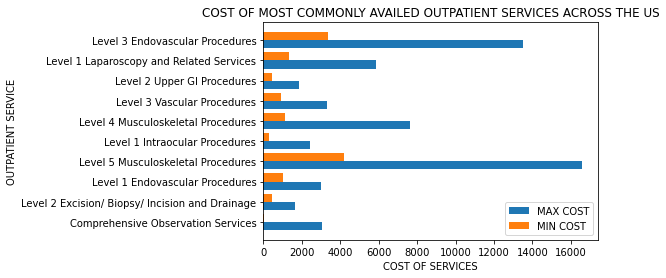

In [110]:
# Difference in Cost of Most Frequently used Outpatient Services in the US

X = opdxp9 ['APC_Desc']
y = opdxp9 ['MAX_COST']
z = opdxp9 ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("OUTPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST COMMONLY AVAILED OUTPATIENT SERVICES ACROSS THE US")
plt.legend()
plt.show()



In [28]:
opdxp8a = opdxp8.sort_values(by = 'PT_CT', ascending=True)
opdxp8a = opdxp8a.dropna()
opdxp8a = opdxp8a[opdxp8a.PT_CT != 0.0]
opdxp9a = opdxp8a.head(10)
opdxp9a

APC_Cd                                           APC_Desc      AVG_COST  \
26    5211              Level 1 Electrophysiologic Procedures    728.517769   
34    5244  Level 4 Blood Product Exchange and Related Ser...  43148.735330   
59    5493                     Level 3 Intraocular Procedures   5333.580391   
51    5432                           Level 2 Nerve Procedures   4265.129532   
5     5094  Level 4 Breast/Lymphatic Surgery and Related P...  12133.405534   
25    5200          Implantation Wireless PA Pressure Monitor  27200.471956   
52    5461     Level 1 Neurostimulator and Related Procedures   2400.703807   
10    5116                 Level 6 Musculoskeletal Procedures  13781.140013   
4     5093  Level 3 Breast/Lymphatic Surgery and Related P...   6791.341544   
56    5471               Implantation of Drug Infusion Device  14356.990111   

        MAX_COST      MIN_COST   PT_CT  
26    782.370000    664.208571    29.0  
34  53797.481110  37281.325380    65.0  
59   7622.849375   4308.753000   253.0  
51   6649.304667   3114.192000   398.0  
5   15945.267060   9926.713333   605.0  
25  33072.172220  23396.994620   620.0  
52   3736.877333   1858.252308   825.0  
10  20393.856000  10118.092410  1326.0  
4   10597.091540   5490.017333  1412.0  
56  20987.937270  10976.469170  1814.0

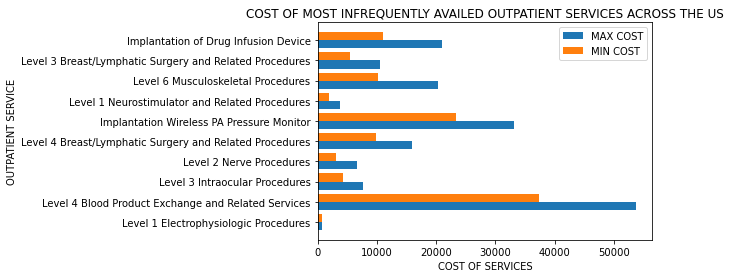

In [113]:
# Difference in Cost of Most Frequently used Outpatient Services in the US

X = opdxp9a ['APC_Desc']
y = opdxp9a ['MAX_COST']
z = opdxp9a ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("OUTPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST INFREQUENTLY AVAILED OUTPATIENT SERVICES ACROSS THE US")
plt.legend()
plt.show()


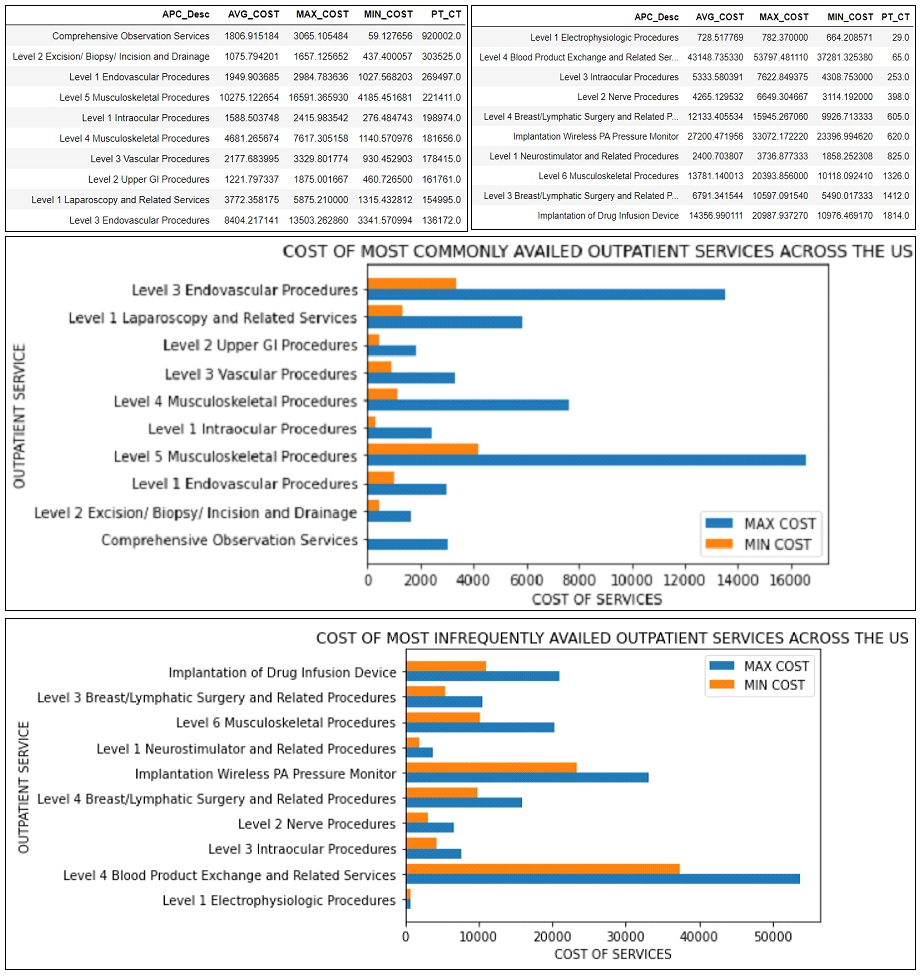

In [29]:
opdxp5a = pd.DataFrame().assign(APC_Cd=opdxp7['APC_Cd'],MAX_COST=opdxp7['MAX_COST'],MIN_COST=opdxp7['MIN_COST'])

opdxp2 = opdxp5a.fillna(0)
opdc_long2=pd.melt(opdxp2,id_vars=['APC_Cd'],var_name='Cost', value_name='Mdr_Amt')
opdc_long2
#opdc_long.info()


#Run One way ANOVA
#Method 1
mod9 = ols('Mdr_Amt ~ Cost', data=opdc_long2).fit()
aov_table9 = sm.stats.anova_lm(mod9, typ=2)
print("One way ANOVA with Cost as IV")
print(aov_table9)
print("")

mod9a = ols('Mdr_Amt ~ APC_Cd', data=opdc_long2).fit()
aov_table9a = sm.stats.anova_lm(mod9a, typ=2)
print("One way ANOVA with APC_Cd as IV")
print(aov_table9a)
print("")


#Run Tukey Post Hoc Test

tukey9a = pairwise_tukeyhsd(endog=opdc_long2['Mdr_Amt'],
                          groups=opdc_long2['Cost'],
                          alpha=0.05)
print("Post Hoc Tukey for Cost as IV")
print(tukey9a)

#perform two-way ANOVA

model9b = ols('Mdr_Amt ~ C(APC_Cd) + C(Cost) + C(APC_Cd):C(Cost)', data=opdc_long2).fit()
aov_table9b = sm.stats.anova_lm(model9b, type=2)
eta_squared(aov_table9b)
omega_squared(aov_table9b)
print("Two way ANOVA")
print(aov_table9b)


One way ANOVA with Cost as IV
                sum_sq     df          F    PR(>F)
Cost      1.492617e+09    1.0  15.204979  0.000153
Residual  1.295796e+10  132.0        NaN       NaN

One way ANOVA with APC_Cd as IV
                sum_sq     df         F   PR(>F)
APC_Cd    1.641881e+08    1.0  1.517027  0.22026
Residual  1.428638e+10  132.0       NaN      NaN

Post Hoc Tukey for Cost as IV
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------
MAX_COST MIN_COST -6675.0081 0.001 -10061.1634 -3288.8528   True
----------------------------------------------------------------
Two way ANOVA
                     df        sum_sq       mean_sq    F  PR(>F)    eta_sq  \
C(APC_Cd)          66.0  1.118575e+10  1.694810e+08  0.0     NaN  0.774069   
C(Cost)             1.0  1.492617e+09  1.492617e+09  0.0     NaN  0.103291   
C(APC_Cd):C(Cost)  66.0  1.772208

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Nicole\AppData\Local\Temp/ipykernel_8460/666181714.py:9: RuntimeWarning:

divide by zero encountered in double_scalars



###  CONCLUSION: 

### There is a significant difference in cost between the same outpatient services being offered at different facilites for the most frequently as well as infrequently availed services across the US

### Difference in Cost of Most Frequently used Outpatient Services in Indiana State

In [30]:
dfopd_ct=df_opd[df_opd['Prv_State']== 'IN']
dfopd_ct.head()
opdxpa = pd.DataFrame().assign(APC_Cd=dfopd_ct['APC_Cd'],APC_Desc=dfopd_ct['APC_Desc'], MDR_AMT=dfopd_ct['Avg_Mdcr_Pymt_Amt'])
opdxp_avga = opdxpa.groupby(['APC_Cd', 'APC_Desc']).mean().reset_index()
opdxp_maxa = opdxpa.groupby(['APC_Cd', 'APC_Desc']).max().reset_index() 
opdxp_mina = opdxpa.groupby(['APC_Cd', 'APC_Desc']).min().reset_index() 
opdxpb = pd.merge(opdxp_avga, opdxp_maxa, how='left', left_on=['APC_Cd'], right_on = ['APC_Cd'])
opdxpc = pd.merge(opdxpb, opdxp_mina, how='left', left_on=['APC_Cd'], right_on = ['APC_Cd'])
opdxpd = pd.DataFrame().assign(APC_Cd=opdxpc['APC_Cd'],APC_Desc=opdxpc['APC_Desc_x'],AVG_COST=opdxpc['MDR_AMT_x'],MAX_COST=opdxpc['MDR_AMT_y'],MIN_COST=opdxpc['MDR_AMT'])

opdxpf = pd.DataFrame().assign(APC_Cd=dfopd_ct['APC_Cd'],APC_Desc=dfopd_ct['APC_Desc'], PT_CT=dfopd_ct['Bene_Cnt'])
opdxp_pta = opdxpf.groupby(['APC_Cd', 'APC_Desc']).sum()
opdxpg = pd.merge(opdxpd, opdxp_pta, how='left', left_on=['APC_Cd'], right_on = ['APC_Cd'])
opdxph = pd.DataFrame().assign(APC_Cd=opdxpg['APC_Cd'],APC_Desc=opdxpg['APC_Desc'],AVG_COST=opdxpg['AVG_COST'],MAX_COST=opdxpg['MAX_COST'],MIN_COST=opdxpg['MIN_COST'],PT_CT=opdxpg['PT_CT'])
opdxph = opdxph.sort_values(by = 'PT_CT', ascending=False)
opdxpi = opdxph.head(10)
opdxpi


APC_Cd                                         APC_Desc     AVG_COST  \
62    8011               Comprehensive Observation Services  1759.908803   
0     5072  Level 2 Excision/ Biopsy/ Incision and Drainage  1054.050580   
21    5191                  Level 1 Endovascular Procedures  1916.138706   
9     5115               Level 5 Musculoskeletal Procedures  9977.652221   
19    5183                      Level 3 Vascular Procedures  2128.622057   
8     5114               Level 4 Musculoskeletal Procedures  4563.191911   
56    5491                   Level 1 Intraocular Procedures  1500.677537   
34    5302                      Level 2 Upper GI Procedures  1185.830777   
23    5193                  Level 3 Endovascular Procedures  8214.670330   
42    5374             Level 4 Urology and Related Services  2335.608816   

        MAX_COST     MIN_COST    PT_CT  
62   1965.492289  1561.679262  23407.0  
0    1148.495534   961.232727   8333.0  
21   2097.898529  1773.452238   7560.0  
9   11209.376670  8965.336667   5792.0  
19   2347.227391  1881.735556   5410.0  
8    4971.157576  4199.214865   5060.0  
56   1629.199950   276.484743   4968.0  
34   1307.816400   980.915909   4770.0  
23   8591.747500  7528.752414   3908.0  
42   2445.150435  2161.593448   3500.0

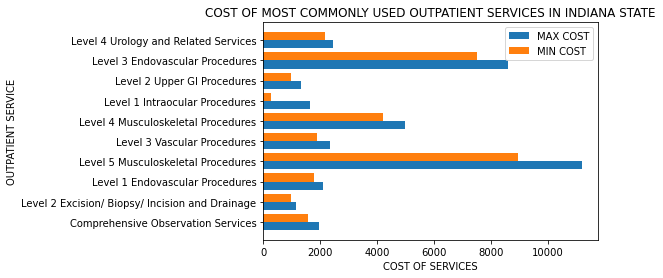

In [115]:
# Difference in Cost of Most Frequently used Outpatient Services in Indiana State

X = opdxpi ['APC_Desc']
y = opdxpi ['MAX_COST']
z = opdxpi ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("OUTPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST COMMONLY AVAILED OUTPATIENT SERVICES IN INDIANA STATE")
plt.legend()
plt.show()

In [31]:
opdxpha = opdxph.sort_values(by = 'PT_CT', ascending=True)
opdxpha = opdxpha.dropna()
opdxpha = opdxpha[opdxpha.PT_CT != 0.0]
opdxpia = opdxpha.head(10)
opdxpia

APC_Cd                                           APC_Desc      AVG_COST  \
59    5504  Level 4 Extraocular, Repair, and Plastic Eye P...   2399.546795   
4     5093  Level 3 Breast/Lymphatic Surgery and Related P...   6730.875000   
25    5200          Implantation Wireless PA Pressure Monitor  24800.627500   
51    5461     Level 1 Neurostimulator and Related Procedures   2328.045231   
48    5416                     Level 6 Gynecologic Procedures   5018.662769   
55    5471               Implantation of Drug Infusion Device  13093.181475   
17    5166                         Cochlear Implant Procedure  31728.292320   
14    5163                             Level 3 ENT Procedures    997.869917   
60    5627                          Level 7 Radiation Therapy   6481.682926   
45    5377               Level 7 Urology and Related Services  15684.409363   

        MAX_COST      MIN_COST  PT_CT  
59   2514.336667   2284.756923   12.0  
4    6730.875000   6730.875000   12.0  
25  24800.627500  24800.627500   16.0  
51   2344.032000   2312.058462   28.0  
48   5284.871538   4752.454000   33.0  
55  14135.844710  12050.518240   34.0  
17  31819.715710  31667.723750   41.0  
14   1066.946154    862.149048   70.0  
60   6556.698571   6376.596875   73.0  
45  16222.670000  15162.975450   81.0

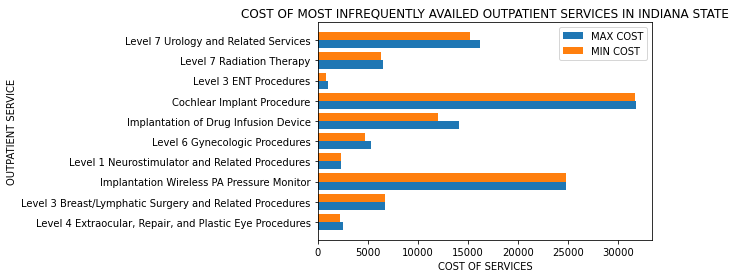

In [119]:
# Difference in Cost of Most Frequently used Outpatient Services in Indiana State

X = opdxpia ['APC_Desc']
y = opdxpia ['MAX_COST']
z = opdxpia ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("OUTPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST INFREQUENTLY AVAILED OUTPATIENT SERVICES IN INDIANA STATE")
plt.legend()
plt.show()

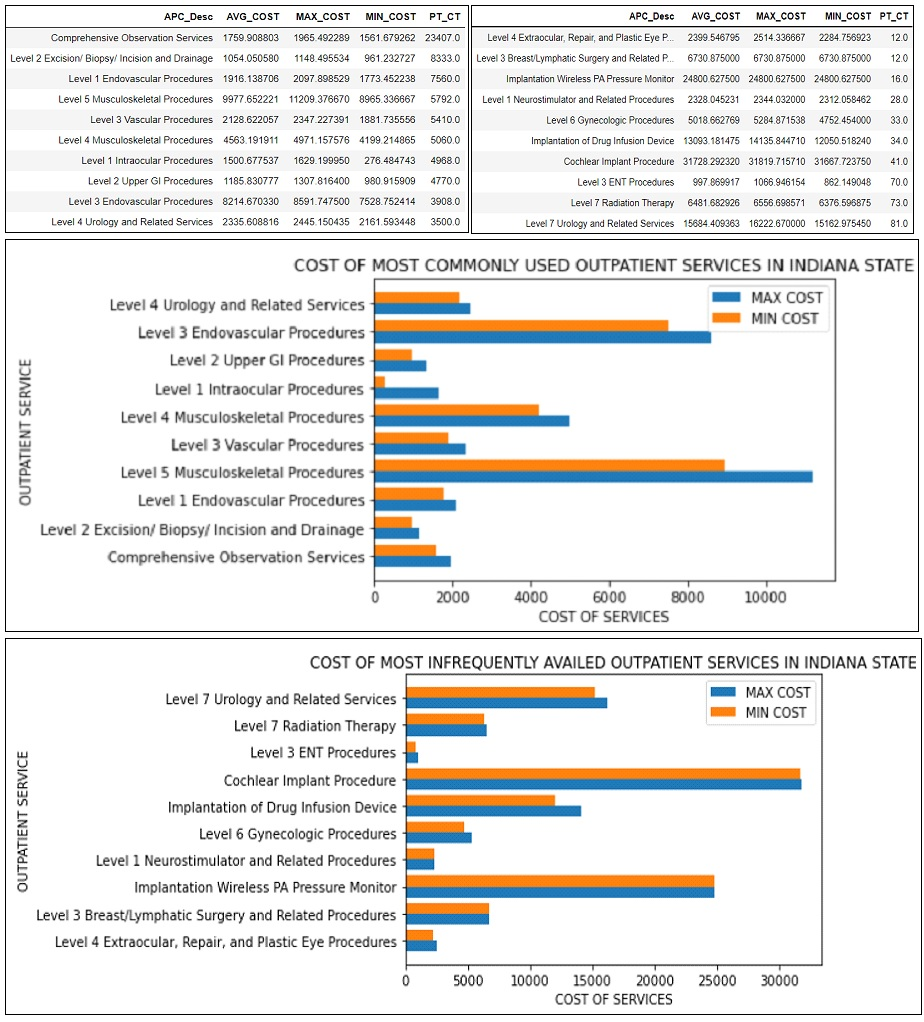

In [32]:
opdxp6a = pd.DataFrame().assign(APC_Cd=opdxpg['APC_Cd'],MAX_COST=opdxpg['MAX_COST'],MIN_COST=opdxpg['MIN_COST'])

opdxp3 = opdxp6a.fillna(0)
opdc_long3=pd.melt(opdxp3,id_vars=['APC_Cd'],var_name='Cost', value_name='Mdr_Amt')
opdc_long3
#opdc_long.info()


#Run One way ANOVA
#Method 1
mod10 = ols('Mdr_Amt ~ Cost', data=opdc_long3).fit()
aov_table10 = sm.stats.anova_lm(mod10, typ=2)
print("One way ANOVA with Cost as IV")
print(aov_table10)
print("")

mod10a = ols('Mdr_Amt ~ APC_Cd', data=opdc_long3).fit()
aov_table10a = sm.stats.anova_lm(mod10a, typ=2)
print("One way ANOVA with APC_Cd as IV")
print(aov_table10a)
print("")


#Run Tukey Post Hoc Test

tukey10a = pairwise_tukeyhsd(endog=opdc_long3['Mdr_Amt'],
                          groups=opdc_long3['Cost'],
                          alpha=0.05)
print("Post Hoc Tukey for Cost as IV")
print(tukey10a)

#perform two-way ANOVA

model10b = ols('Mdr_Amt ~ C(APC_Cd) + C(Cost) + C(APC_Cd):C(Cost)', data=opdc_long3).fit()
aov_table10b = sm.stats.anova_lm(model10b, type=2)
eta_squared(aov_table10b)
omega_squared(aov_table10b)
print("Two way ANOVA")
print(aov_table10b)


One way ANOVA with Cost as IV
                sum_sq     df       F    PR(>F)
Cost      2.284309e+07    1.0  0.4125  0.521889
Residual  6.866768e+09  124.0     NaN       NaN

One way ANOVA with APC_Cd as IV
                sum_sq     df         F   PR(>F)
APC_Cd    4.236251e+07    1.0  0.767162  0.38279
Residual  6.847249e+09  124.0       NaN      NaN

Post Hoc Tukey for Cost as IV
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff p-adj    lower      upper   reject
--------------------------------------------------------------
MAX_COST MIN_COST -851.5736 0.5249 -3475.8969 1772.7498  False
--------------------------------------------------------------
Two way ANOVA
                     df        sum_sq       mean_sq    F  PR(>F)    eta_sq  \
C(APC_Cd)          62.0  6.824754e+09  1.100767e+08  0.0     NaN  0.990586   
C(Cost)             1.0  2.284309e+07  2.284309e+07  0.0     NaN  0.003316   
C(APC_Cd):C(Cost)  62.0  4.201454e+07  6.776539e+05 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Nicole\AppData\Local\Temp/ipykernel_8460/666181714.py:9: RuntimeWarning:

divide by zero encountered in double_scalars



### CONCLUSION:

### The significant difference in the cost of outpatient services that are seen at the national level, while evident in case of the most expensive services, cannot be seen for the most infrequently availed services offered in the State of Indiana